# O que é agrupamento (clustering)?

O clustering é um método de aprendizado de máquina dentro da categoria de aprendizado não supervisionado. Ele é utilizado para analisar e agrupar um conjunto de dados baseando-se em características e similaridades intrínsecas entre os pontos de dados, sem que rótulos pré-definidos sejam fornecidos. Diferente do aprendizado supervisionado, onde tanto as entradas quanto as saídas desejadas são conhecidas e usadas para treinar modelos (como em uma classificação binária utilizando regressão logística ou redes neurais para definir fronteiras de decisão), o clustering depende apenas das características dos dados (inputs).

A ideia principal do clustering é identificar estruturas ou padrões interessantes nos dados agrupando pontos similares. Por exemplo, num conjunto de dados representado apenas por pontos em um gráfico, o algoritmo de clustering tenta identificar como esses pontos podem ser agrupados em clusters ou grupos que compartilham propriedades semelhantes. Isso é feito sem nenhuma indicação prévia de quais grupos deveriam existir, o que o diferencia fundamentalmente das técnicas de aprendizado supervisionado, onde as categorias são predeterminadas.

Esta técnica encontra aplicações variadas e valiosas em muitos campos. Na educação online, por exemplo, o clustering pode ajudar a segmentar os alunos com base em seus interesses e objetivos de aprendizado, possibilitando uma abordagem mais personalizada. Na medicina, é útil para agrupar pacientes com base em dados de expressão genética, ajudando na identificação de padrões que podem influenciar tratamentos e diagnósticos. Na astronomia, agrupa corpos celestes para ajudar astrônomos a analisar e entender melhor as estruturas do espaço. 

# Intuição sobre o K-means

O algoritmo de K-means é uma técnica de agrupamento muito utilizada em aprendizado de máquina não supervisionado, que visa particionar um conjunto de dados em grupos (clusters) distintos. Vamos explorar como esse algoritmo funciona através de um exemplo prático com um conjunto de dados composto por 30 pontos sem rótulos.

Primeiramente, o K-means inicia o processo escolhendo aleatoriamente pontos que supõe serem os centros dos clusters que deseja identificar. No nosso exemplo, vamos tentar encontrar dois clusters. Para isso, o algoritmo seleciona dois pontos iniciais, marcados por cruzes vermelha e azul, que representam uma suposição inicial dos centros dos clusters.

O processo do K-means envolve repetidamente duas etapas principais:

1. **Atribuição dos pontos aos centros de cluster**: Nesta etapa, o algoritmo percorre cada ponto do conjunto de dados e verifica qual dos centros de cluster (vermelho ou azul) está mais próximo. Cada ponto é então atribuído ao cluster cujo centro está mais próximo. Por exemplo, se um ponto está mais perto da cruz vermelha, ele é "pintado" de vermelho, indicando que pertence ao cluster vermelho, e vice-versa.

2. **Atualização dos centros dos clusters**: Depois de atribuir todos os pontos a um cluster, o K-means recalcula o centro de cada cluster. Isso é feito tomando a média das posições de todos os pontos atribuídos a cada cluster. O centro de cada cluster (as cruzes) é então movido para a localização média dos pontos correspondentes.

Estas duas etapas são repetidas iterativamente: após mover os centros, os pontos são novamente atribuídos aos centros mais próximos com base nas novas posições, e os centros são novamente atualizados. Esse processo é repetido até que não haja mais mudanças significativas na atribuição dos pontos aos clusters ou na posição dos centros, indicando que o algoritmo convergiu.

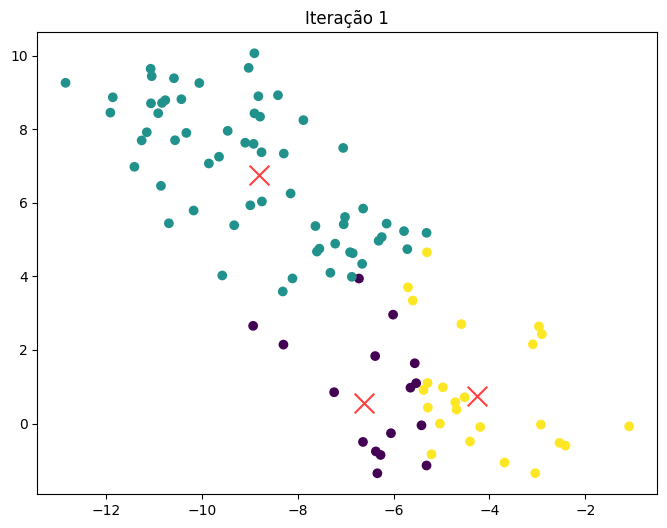

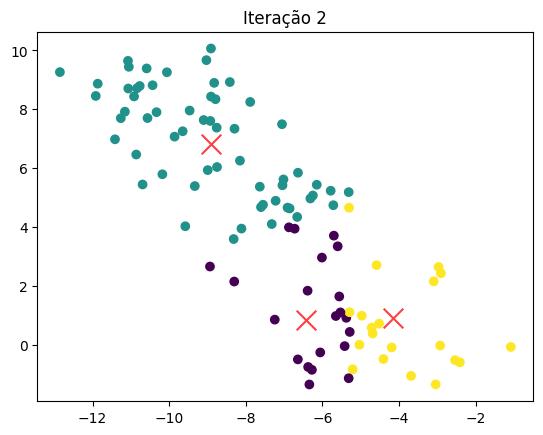

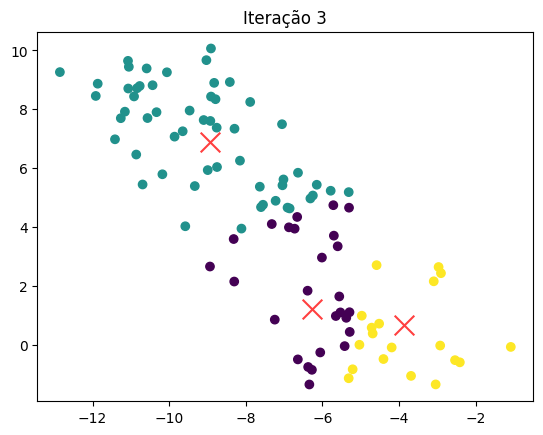

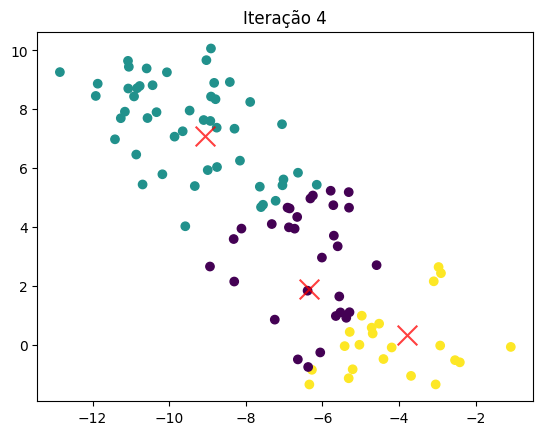

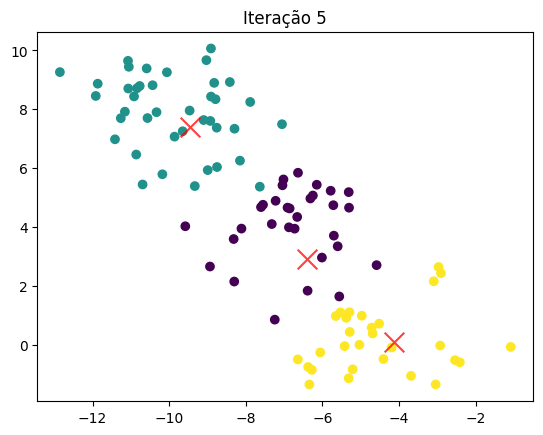

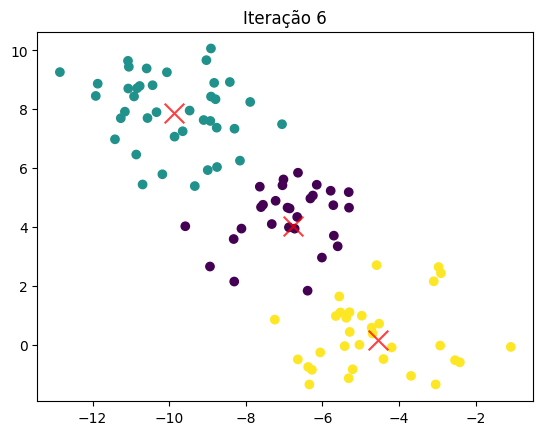

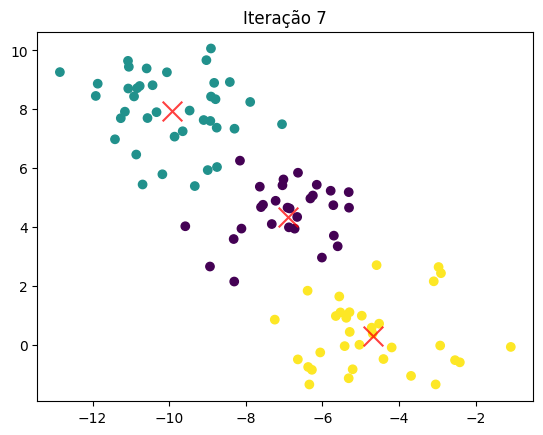

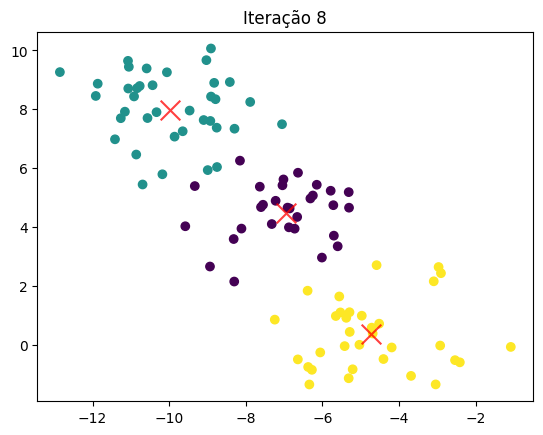

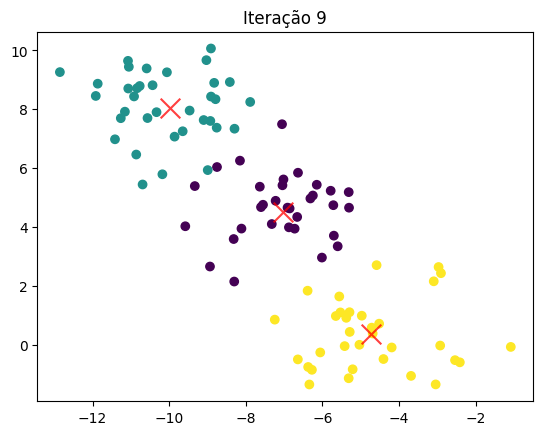

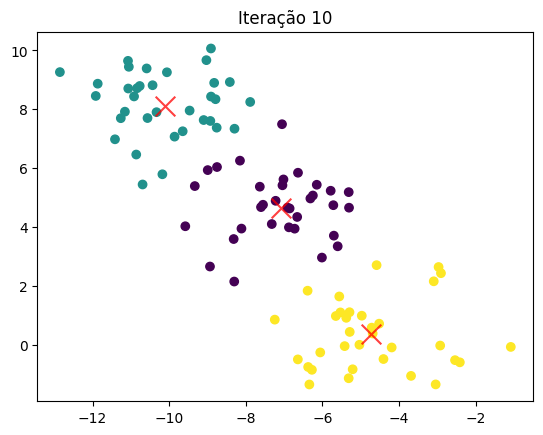

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Gerar dados artificiais
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=12)

# Inicializar o K-means com número máximo de iterações definido para 1 para atualizar manualmente
kmeans = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=0)

# Figura para a visualização
plt.figure(figsize=(8, 6))

for i in range(10):  # Vamos iterar 10 vezes
    kmeans.fit(X)  # Ajustar K-means aos dados
    y_kmeans = kmeans.predict(X)  # Obter os rótulos dos clusters
    
    # Limpar o gráfico anterior
    plt.clf()
    
    # Plotar os pontos e colorir por cluster
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
    
    # Plotar os centróides
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
    
    # Configurações do gráfico
    plt.title(f'Iteração {i+1}')
    plt.pause(0.5)  # Pausar brevemente para visualização
    
    # Calcular novos centróides
    kmeans = KMeans(n_clusters=3, init=centers, n_init=1, max_iter=1, random_state=0)

plt.show()

# Algoritmo K-means

O algoritmo K-means é uma técnica de agrupamento usada em aprendizado de máquina não supervisionado, que visa organizar um conjunto de dados em `K` grupos (ou clusters), onde `K` é o número de centróides inicialmente definido. Aqui está uma explicação detalhada de como o algoritmo K-means funciona:

### Inicialização
O primeiro passo no algoritmo K-means é a inicialização aleatória dos centróides dos clusters. Cada centróide, denotado por `Mu`, é um vetor com a mesma dimensão dos exemplos de treinamento. Por exemplo, se cada exemplo de treinamento tem duas características, então cada `Mu` será um vetor bidimensional. Esses centróides são escolhidos aleatoriamente dentre os pontos de dados ou definidos a partir de uma distribuição aleatória que engloba os dados.

### Atribuição de Pontos aos Clusters
Após a inicialização, o algoritmo procede para a atribuição de cada ponto do conjunto de dados ao centróide mais próximo. Essa proximidade é geralmente medida usando a distância Euclidiana, embora outras métricas também possam ser usadas. Matematicamente, para cada ponto `x^i`, o algoritmo identifica o `k` que minimiza a distância entre `x^i` e `Mu k`, onde `Mu k` representa o k-ésimo centróide. Esta etapa resulta na formação de `K` grupos de pontos.

### Atualização dos Centróides
Depois de todos os pontos serem atribuídos a um centróide, o passo seguinte é recalibrar cada centróide `Mu k` para que ele se torne o ponto médio de todos os pontos atribuídos a ele. Isso é feito calculando a média de todas as características dos pontos dentro de cada cluster. Se `Mu1` é o centróide do primeiro cluster, ele será recalculado como a média de todos os pontos atribuídos a esse cluster.

### Iteração
Os passos de atribuição de pontos e atualização de centróides são repetidos iterativamente. Em cada iteração, os centróides se deslocam até que a atribuição de pontos aos clusters não mude mais entre as iterações, ou até que as mudanças nos centróides entre as iterações estejam abaixo de um limiar definido, indicando que o algoritmo convergiu.

### Casos Especiais
Durante o processo, pode ocorrer de um centróide não ter nenhum ponto atribuído a ele (especialmente se `K` for escolhido muito alto em relação à distribuição dos dados). Nesses casos, uma abordagem comum é remover esse cluster ou redefinir aleatoriamente o centróide em questão.

Sua aplicabilidade não se restringe a situações com separações óbvias; ele também pode ser extremamente útil em cenários onde os dados são mais homogêneos ou onde não existem agrupamentos óbvios.

Um exemplo prático da utilidade do K-means em dados não claramente separados pode ser observado na indústria da moda, especificamente no dimensionamento de camisetas. Suponha que um fabricante de camisetas deseje definir as dimensões ideais para os tamanhos pequeno, médio e grande. Para isso, ele pode coletar dados sobre altura e peso dos potenciais consumidores. Essas variáveis, embora variem continuamente na população e não formem agrupamentos claramente delimitados, são essenciais para o processo de decisão.

Ao aplicar o K-means para segmentar esses dados em três clusters — presumivelmente correspondendo aos tamanhos pequeno, médio e grande — o algoritmo tentaria encontrar os centróides que representam o ponto médio dos dados em cada cluster. Esses centróides, ou pontos centrais, ajudariam o fabricante a entender quais são as medidas mais representativas para cada tamanho de camiseta, permitindo que ajustem seus produtos para atender melhor as necessidades de seus clientes.

Portanto, mesmo em um conjunto de dados onde as categorias não são imediatamente aparentes, o K-means pode fornecer insights valiosos que auxiliam na tomada de decisões práticas, como no caso da fabricação de camisetas, onde os centróides ajudam a definir especificações de produto que melhor atendem a diversidade de formas e tamanhos dos consumidores.

# Objetivo de otimização

### Função de Custo do K-means

A função de custo no K-means, denotada como $ J $, é definida como a soma das distâncias quadradas entre cada ponto de dado e o centróide do cluster ao qual o ponto está atribuído. Matematicamente, isso é expresso como:

$$ J = \frac{1}{M} \sum_{i=1}^{M} \| x_i - \mu_{c_i} \|^2 $$

Onde:
- $ M $ é o número total de exemplos de treinamento.
- $ x_i $ representa o i-ésimo exemplo de treinamento.
- $ \mu_{c_i} $ é o centróide do cluster ao qual o i-ésimo exemplo está atribuído.
- $ c_i $ é o índice do cluster ao qual $ x_i $ está atribuído, variando de 1 a $ K $, onde $ K $ é o número de clusters.

### Otimização da Função de Custo

O objetivo do K-means é ajustar os centróides dos clusters $ \mu $ e as atribuições de cluster $ c $ de tal maneira que a função de custo $ J $ seja minimizada. Isso é conseguido através de dois passos principais que são repetidos iterativamente:

1. **Atribuição de Cluster**: Cada ponto de dado é atribuído ao centróide do cluster mais próximo, baseado na distância Euclidiana. Este passo garante que cada ponto é agrupado com os pontos mais similares a ele.

2. **Atualização dos Centróides**: Após todos os pontos serem atribuídos a um cluster, os centróides são recalculados como sendo a média de todos os pontos atribuídos a cada cluster. Este passo reposiciona o centróide no coração geométrico de seus membros, otimizando a localização central em relação aos pontos atribuídos.

### Convergência do Algoritmo

O processo de alternar entre a atribuição de cluster e a atualização dos centróides continua até que não haja mais mudanças significativas nas atribuições de cluster ou nos próprios centróides, indicando que o algoritmo convergiu e a função de custo $ J $ está minimizada. Isso significa que os clusters formados são tão homogêneos internamente quanto possível e tão diferenciados entre si quanto possível, em termos de distância.

A função de custo $ J $, também conhecida na literatura como função de distorção, é central para o funcionamento do algoritmo K-means. Esse nome, apesar de não ser muito intuitivo, refere-se ao objetivo do algoritmo de minimizar as distâncias quadradas entre os pontos de dados e os centróides dos clusters aos quais estão atribuídos. Entender como o K-means tenta minimizar essa função de custo oferece uma visão clara sobre sua metodologia e eficácia.

### Minimização da Função de Distorção

O algoritmo K-means executa dois passos principais para minimizar a função de distorção:

1. **Atribuição de Pontos aos Centróides**: No primeiro passo do K-means, cada ponto de dados é atribuído ao centróide mais próximo. Esta etapa foca em atualizar as atribuições de cluster $ C_1, C_2, \ldots, C_M $ para minimizar a função de custo $ J $, mantendo as posições dos centróides ($ \mu_1, \mu_2, \ldots, \mu_K $) fixas. O objetivo aqui é escolher o $ C_i $ que faz a distância (ou distância quadrada para simplificação computacional) entre o ponto de dados $ x_i $ e o centróide do cluster $ \mu_{C_i} $ ser a menor possível. Por exemplo, se um ponto de dados está mais próximo do centróide 1 do que do centróide 2, atribuí-lo ao centróide 1 minimizará a contribuição desse ponto para a função de custo total.

2. **Atualização dos Centróides**: O segundo passo envolve ajustar a posição dos centróides com base nos pontos que foram atribuídos a eles. Nesta etapa, as atribuições de cluster são mantidas fixas, e o objetivo é ajustar $ \mu_k $ para minimizar $ J $. O novo $ \mu_k $ é calculado como a média de todos os pontos atribuídos a esse centróide, o que efetivamente minimiza a soma das distâncias quadradas de todos os pontos no cluster até o centróide. Para entender isso, considere um exemplo simplificado: se um cluster contém apenas dois pontos, posicionar o centróide no meio desses dois pontos minimiza a soma das distâncias quadradas de ambos os pontos ao centróide, em comparação com qualquer outra posição.

### Exemplo Ilustrativo

Para ilustrar, imagine um cluster com dois pontos, um a uma unidade de distância do centróide e outro a nove unidades. A soma das distâncias quadradas seria $ 1^2 + 9^2 = 82 $. No entanto, se o centróide for movido para a posição média desses dois pontos, as distâncias se tornam iguais (cinco unidades de cada ponto ao centróide), resultando em $ 5^2 + 5^2 = 50 $, que é menor que 82, mostrando uma redução significativa na função de custo.

# Inicialização dos Centróides

A inicialização dos centróides é uma etapa crucial no algoritmo de agrupamento K-means, que influencia significativamente os resultados finais do processo de agrupamento. Neste método, os centróides iniciais são escolhidos antes de iterar nas etapas de atribuição de pontos e atualização dos centróides. A escolha de como esses pontos iniciais são definidos pode determinar a eficácia com que o algoritmo identifica grupos distintos dentro do conjunto de dados.

### Escolha dos Centróides Iniciais

Em muitas implementações do K-means, os centróides são inicializados de forma aleatória. Uma abordagem comum, e frequentemente mais eficaz, é selecionar $ K $ exemplos aleatórios do conjunto de dados para servir como os centróides iniciais. Esta técnica é preferida porque baseia os centróides em pontos de dados reais, o que pode ajudar a assegurar que cada centróide esteja posicionado de forma a representar efetivamente um segmento do conjunto de dados.

### Por Que Usar Dados Reais para Inicialização?

Usar pontos de dados reais como centróides iniciais oferece várias vantagens:
- **Relevância**: Cada centróide inicial está garantido de estar dentro do espaço de variação dos dados, o que pode ajudar a minimizar a distância total entre os pontos e seus centróides correspondentes logo no início do processo.
- **Diversidade**: Ao escolher pontos aleatórios, há uma chance maior de que os centróides capturem a diversidade presente no conjunto de dados, o que pode levar a uma melhor segmentação geral.
- **Eficiência**: Inicializar com pontos de dados pode reduzir o número de iterações necessárias para que o algoritmo converge, já que os centróides começam de posições potencialmente ótimas.

### Considerações Sobre o Número de Centróides

É crucial que o número de centróides $ K $ seja escolhido adequadamente. Idealmente, $ K $ deve ser menor que o número de exemplos de treinamento $ m $, porque um valor de $ K $ maior que $ m $ não faz sentido prático — não haveria exemplos suficientes para formar clusters significativos. Por exemplo, se temos 30 pontos de dados, fazer $ K $ igual a 2 é razoável, pois permite uma distribuição equilibrada dos dados entre os clusters.

### Impacto da Inicialização na Formação dos Clusters

A forma como os centróides são inicializados pode afetar significativamente os clusters finais encontrados pelo K-means. Uma inicialização infeliz pode levar a agrupamentos subótimos, onde os clusters podem não capturar as verdadeiras divisões no conjunto de dados. Portanto, muitas implementações modernas de K-means incluem mecanismos para várias inicializações aleatórias, escolhendo a configuração que resulta no menor valor da função de custo, ou empregam métodos mais sofisticados como o K-means++ que otimizam a escolha inicial para espaçar os centróides tão distantes quanto possível um do outro.

A variabilidade nos resultados do algoritmo K-means devido à inicialização dos centróides pode levar a agrupamentos substancialmente diferentes, alguns dos quais podem não ser ótimos. Isso ocorre porque diferentes inicializações podem levar o algoritmo a convergir para mínimos locais da função de custo, conhecida como função de distorção. Explorar este fenômeno com um exemplo mais complexo, onde o objetivo é identificar três clusters em um conjunto de dados, pode ajudar a entender como múltiplas inicializações aleatórias afetam a qualidade do agrupamento.

### Exemplo de Inicializações Aleatórias e seus Impactos

Considere um conjunto de dados onde o objetivo é encontrar três clusters. Uma única inicialização aleatória dos centróides pode resultar em um agrupamento eficaz, que parece categorizar bem os dados em três grupos distintos. No entanto, uma inicialização diferente, onde dois centróides começam muito próximos um do outro dentro de um mesmo grupo de pontos, e o terceiro centróide em outro grupo, pode resultar em um agrupamento menos eficiente. Neste último caso, o algoritmo pode ficar preso em um mínimo local, não alcançando a melhor solução possível.

### Estratégias para Melhorar a Convergência

Para contornar o problema dos mínimos locais e melhorar a chance de encontrar o melhor agrupamento possível, uma prática recomendada é executar o K-means várias vezes com diferentes inicializações aleatórias dos centróides. Cada execução independente do K-means pode convergir para um agrupamento diferente, dependendo de onde os centróides são inicialmente posicionados.

### Escolha da Melhor Solução

Após várias execuções, a escolha do melhor agrupamento entre as várias soluções encontradas pode ser feita calculando a função de custo $ J $ para cada uma delas. A solução com o menor valor de $ J $ — indicando a menor distorção total — é geralmente escolhida como a ótima. Por exemplo, se em uma das execuções, os centróides estão bem posicionados de modo que as distâncias quadradas de todos os pontos de cada cluster até seu centróide associado sejam pequenas, essa configuração resultará em um valor baixo de $ J $, sugerindo que é uma solução eficaz.

### Implementação do Algoritmo

Um algoritmo formal para esta abordagem envolveria:
1. Executar o K-means várias vezes (por exemplo, três vezes) com diferentes inicializações aleatórias.
2. Calcular a função de custo $ J $ para cada conjunto de clusters encontrados em cada execução.
3. Selecionar a configuração de cluster que resulta no menor valor de $ J $.

### Algoritmo de Múltiplas Inicializações para K-means

**Passo a Passo:**

1. **Inicialização**: Selecione $ K $ exemplos de treinamento aleatoriamente como centróides iniciais dos clusters. Esta escolha se baseia na prática de posicionar os centróides iniciais diretamente em pontos de dados reais, o que geralmente fornece um ponto de partida mais representativo para o agrupamento.

2. **Execução do K-means**: Com os centróides iniciais definidos, execute o algoritmo K-means até que ele convirja. Isto é, até que os centróides deixem de se mover significativamente ou até que as atribuições de pontos aos clusters estabilizem.

3. **Cálculo da Função de Custo**: Após a convergência, calcule a função de custo, também conhecida como função de distorção, que mede a soma das distâncias quadradas de todos os pontos aos centróides dos seus respectivos clusters.

4. **Repetição**: Repita os passos de 1 a 3 um número significativo de vezes (por exemplo, 100 vezes). Cada repetição deve usar uma nova inicialização aleatória dos centróides.

5. **Seleção do Melhor Resultado**: Entre todos os agrupamentos gerados nas diferentes iterações, escolha aquele que apresenta o menor valor da função de distorção. Este será o conjunto de clusters considerado como o mais eficaz para representar a estrutura natural dos dados.

### Vantagens da Abordagem de Múltiplas Inicializações

- **Redução de Mínimos Locais**: Ao executar o K-means várias vezes com diferentes inicializações, a probabilidade de ficar preso em mínimos locais subótimos diminui significativamente. Isso ocorre porque cada inicialização aleatória oferece uma nova chance para explorar diferentes partes do espaço de solução.

- **Melhoria da Qualidade dos Clusters**: Com mais tentativas, é mais provável encontrar uma configuração de clusters que capture verdadeiramente as divisões naturais no conjunto de dados.

- **Estabilidade dos Resultados**: A repetição do processo ajuda a garantir que o resultado final seja estável e confiável, refletindo uma tendência real dos dados, em vez de uma peculiaridade de uma inicialização particularmente infeliz.

### Considerações Práticas

- **Custo Computacional**: Embora aumentar o número de inicializações possa melhorar a qualidade dos clusters, isso também aumenta o custo computacional. Portanto, é essencial encontrar um equilíbrio entre o número de execuções e a capacidade computacional disponível.

- **Retornos Decrescentes**: Executar o K-means um número excessivamente alto de vezes (muito além de 1000, por exemplo) pode levar a retornos decrescentes, onde melhorias adicionais na qualidade dos clusters tornam-se marginais em relação ao custo computacional adicional.


# Escolhendo o número de clusters

### Ambiguidade na Escolha de $ K $

A escolha de $ K $ é intrinsicamente ambígua em muitas situações. Diferentes analistas podem olhar para o mesmo conjunto de dados e interpretar um número variado de clusters com base nas características visuais ou estatísticas dos dados. Por exemplo, alguns podem ver dois clusters claros, enquanto outros podem identificar quatro ou mais. Isso reflete a natureza subjetiva e muitas vezes intuitiva do aprendizado não supervisionado, onde não há respostas "corretas" pré-definidas.

### Métodos para Determinar $ K $

Embora a escolha de $ K $ possa ser subjetiva, existem técnicas desenvolvidas para ajudar a informar essa decisão:

1. **Método do Cotovelo**: Uma das abordagens mais conhecidas é o método do cotovelo. Esse método envolve executar o K-means várias vezes com diferentes valores de $ K $ e plotar a função de custo (ou distorção) em relação ao número de clusters. A ideia é identificar o ponto onde o aumento no número de clusters deixa de resultar em melhorias significativas na redução da função de custo — esse ponto é muitas vezes visualizado como um "cotovelo" no gráfico. Por exemplo, se o gráfico mostra uma queda acentuada na distorção ao passar de 1 para 2 clusters, mas mudanças menores de 3 para 4 clusters, $ K = 3 $ pode ser uma escolha razoável.

2. **Análise da Silhueta**: Outra técnica envolve a análise da silhueta, que mede a qualidade de um clustering baseando-se em quão bem cada ponto de dados foi agrupado com pontos semelhantes e quão separado ele está de pontos de outros clusters. Valores mais altos indicam um agrupamento mais adequado.

### Desafios e Considerações

- **Complexidade Computacional**: Executar o K-means repetidamente para diferentes valores de $ K $ pode ser computacionalmente caro, especialmente para grandes conjuntos de dados.
  
- **Escolha Subjetiva**: Mesmo com métodos analíticos como o cotovelo, a decisão final pode ainda depender da interpretação dos resultados, do conhecimento do domínio e do objetivo da análise.

- **Minimizar a Função de Custo Não é Ideal**: Escolher $ K $ simplesmente para minimizar a função de custo geralmente não é recomendado, pois pode levar à superparametrização, onde o modelo escolhe um número excessivamente alto de clusters, cada um contendo poucos pontos, o que pode reduzir a utilidade prática do modelo.


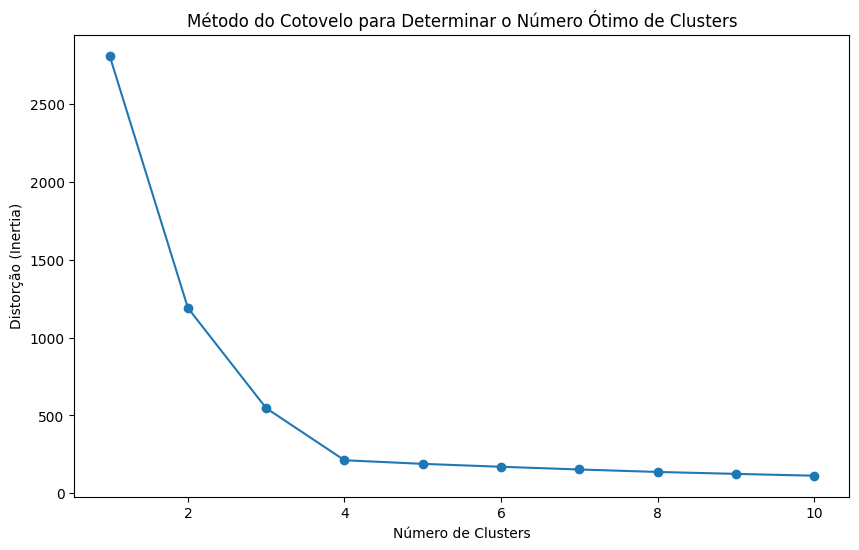

In [2]:
# Gerar dados artificiais
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Lista para armazenar as distorções
distortions = []

# Calcular a distorção para diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção (Inertia)')
plt.show()

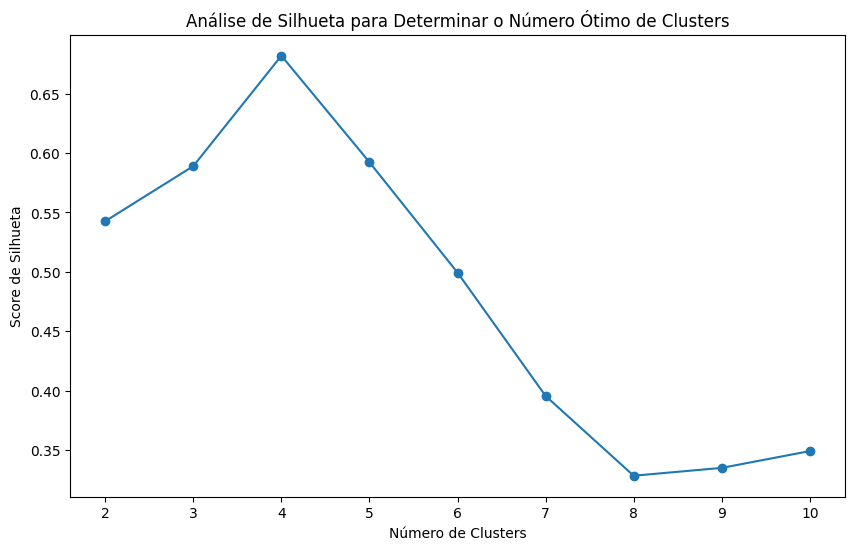

In [3]:
from sklearn.metrics import silhouette_score

# Lista para armazenar os scores de silhueta
silhouette_scores = []

# Calcular o score de silhueta para diferentes números de clusters
for i in range(2, 11):  # começando de 2 porque silhueta não pode ser calculada com apenas 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar a análise de silhueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Análise de Silhueta para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhueta')
plt.show()

Em ambos os casos o número ótimo seria 4

Escolher o valor de $ K $ no algoritmo K-means deve ser guiado pelo propósito específico para o qual os clusters serão usados. Isso envolve considerar como os resultados do agrupamento afetarão as decisões ou processos subsequentes, uma prática comum em diversas aplicações comerciais e técnicas.

### Exemplo Prático: Dimensionamento de Camisetas

Ao considerar um caso de uso como o dimensionamento de camisetas, podemos optar por diferentes números de clusters, cada um refletindo uma estratégia de mercado distinta. Por exemplo:

- **Três Clusters**: Se optarmos por três tamanhos de camisetas (Pequeno, Médio e Grande), podemos usar o K-means para identificar três grupos principais de clientes com base em suas medidas físicas. Este modelo pode ser simples e cobrir uma ampla gama de clientes, mas pode não atender tão bem a pessoas que estão nos extremos dos tamanhos.

- **Cinco Clusters**: Uma abordagem com cinco tamanhos (Extra Pequeno, Pequeno, Médio, Grande, Extra Grande) pode oferecer um ajuste mais personalizado e aumentar a satisfação do cliente, mas implicará custos adicionais de produção e logística.

A decisão entre usar três ou cinco clusters dependerá de uma análise de custo-benefício: os benefícios de um ajuste melhor compensam os custos adicionais?

### Avaliação Baseada em Aplicações Específicas

Avaliar a eficácia do K-means com base em sua utilidade para o propósito pretendido é crucial. No exemplo das camisetas, após realizar o K-means com $ K = 3 $ e $ K = 5 $, analisaríamos qual configuração oferece o melhor equilíbrio entre custo e satisfação do cliente. Esta análise poderia incluir:

- **Feedback do Cliente**: Coleta de feedback sobre a satisfação com os tamanhos disponíveis.
- **Custos de Produção e Distribuição**: Comparação dos custos associados a cada opção de cluster.
- **Vendas e Retornos**: Monitoramento das vendas e taxas de retorno para cada tamanho.

### Aplicação em Compressão de Imagens

Outra aplicação interessante do K-means é na compressão de imagens, onde o número de clusters pode afetar diretamente a qualidade e o tamanho da imagem comprimida. Aqui, o trade-off entre qualidade visual e eficiência de armazenamento pode guiar a escolha de $ K $:

- **Alta Compressão (Baixo $ K $)**: Menor tamanho de arquivo, mas qualidade de imagem potencialmente reduzida.
- **Baixa Compressão (Alto $ K $)**: Melhor qualidade de imagem, mas tamanhos de arquivo maiores.

Escolher o $ K $ ideal, neste caso, envolveria experimentar diferentes valores para ver o impacto na qualidade da imagem e no tamanho do arquivo, decidindo qual compromisso é mais aceitável para o contexto de uso específico.

# Exemplo prático

<a name="1"></a>
## 1 - Implementando K-means

O algoritmo K-means é um método para agrupar automaticamente
pontos de dados juntos. 

* Concretamente, você recebe um conjunto de treinamento $\{x^{(1)}, ..., x^{(m)}\}$, e deseja
agrupar os dados em alguns “clusters” coesos. 


* K-means é um procedimento iterativo que
     * Começa adivinhando os centróides iniciais e depois 
     * Refina esta suposição por 
         * Atribuir repetidamente exemplos aos seus centróides mais próximos e, em seguida, 
         * Recalculando os centróides com base nas atribuições.
         

* Em pseudocódigo, o algoritmo K-means é o seguinte:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* O loop interno do algoritmo executa repetidamente duas etapas: 
    1. Atribuindo cada exemplo de treinamento $x^{(i)}$ ao seu centróide mais próximo, e
    2. Recalcular a média de cada centróide utilizando os pontos atribuídos a ele. 
    
    
* O algoritmo $K$-means sempre convergirá para algum conjunto final de médias para os centróides. 

* Contudo, a solução convergente pode nem sempre ser ideal e depende da configuração inicial dos centróides.
    * Portanto, na prática, o algoritmo K-means geralmente é executado algumas vezes com diferentes inicializações aleatórias. 
    * Uma maneira de escolher entre essas diferentes soluções a partir de diferentes inicializações aleatórias é escolher aquela com menor valor de função de custo (distorção).

<a name="1.1"></a>
### 1.1 Encontrando centróides mais próximos

Na fase de “atribuição de cluster” do algoritmo K-means, o algoritmo atribui cada exemplo de treinamento $x^{(i)}$ ao seu mais próximo centróide, dadas as posições atuais dos centróides.

<a name="ex01"></a>
### Exercício 1

Sua tarefa é completar o código em `find_closest_centroids`.

* Esta função pega a matriz de dados `X` e as localizações de todos centróides dentro de `centroids`.
* Deve gerar um array unidimensional `idx` (que tem o mesmo número de elementos que `X`) que contém o índice do centróide mais próximo (um valor em $\{0,...,K-1\}$, onde $K$ é o número total de centróides) para cada exemplo de treinamento. *(Observação: o intervalo do índice de 0 a K-1 varia ligeiramente do que é mostrado nas aulas (ou seja, 1 a K) porque os índices de lista do Python começam em 0 em vez de 1).*
* Especificamente, para cada exemplo $x^{(i)}$ definimos
  $$
  c^{(i)} := j \quad \text{que minimiza} \quad ||x^{(i)} - \mu_j||^2,
  $$
  onde 
  * $c^{(i)}$ é o índice do centróide que está mais próximo de $x^{(i)}$ (corresponde a `idx[i]` no código inicial), e 
  * $\mu_j$ é a posição (valor) do $j$ésimo centróide (armazenado em `centroids` no código inicial).
  * $||x^{(i)} - \mu_j||$ é a norma L2.


In [4]:
def find_closest_centroids(X, centroids):
    # Número de centróides (K)
    K = centroids.shape[0]
    
    # Inicializa o array de índices com zeros, do mesmo tamanho que o número de exemplos em X
    idx = np.zeros(X.shape[0], dtype=int)

    # Para cada exemplo em X
    for i in range(X.shape[0]):
        # Calcula a distância entre o exemplo X[i] e todos os centróides
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        
        # Atribui o índice do centróide mais próximo ao exemplo X[i]
        idx[i] = np.argmin(distances)
    
    return idx

<a name="1.2"></a>
### 1.2 Calculando as médias dos centróides

Dadas as atribuições de cada ponto a um centróide, a segunda fase do algoritmo recalcula, para cada centróide, a média dos pontos que foram atribuídos a ele.

<a name="ex02"></a>
### Exercício 2

Complete a função `compute_centroids` abaixo para recalcular o valor de cada centróide.

* Especificamente, para cada centróide $\mu_k$ definimos
  $$
  \mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}
  $$
  
  onde 
  * $C_k$ é o conjunto de exemplos que são atribuídos ao centróide $k$
  * $|C_k|$ é o número de exemplos no conjunto $C_k$

* Concretamente, se dois exemplos, digamos $x^{(3)}$ e $x^{(5)}$, são atribuídos ao centróide $k=2$, então você deve atualizar $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [5]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in range(K):
        # Para cada centróide i, extraímos os pontos atribuídos a ele com idx == i
        points_assigned_to_centroid = X[idx == i]
        centroids[i] = (1/len(points_assigned_to_centroid)) * np.sum(points_assigned_to_centroid, axis=0)
    
    return centroids

In [6]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
   
    # Define as cores para os diferentes clusters
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plota os exemplos de treinamento
    for k in range(K):
        # Seleciona exemplos pertencentes ao cluster k
        cluster_points = X[idx == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[k % len(colors)], label=f'Cluster {k+1}')

    # Plota a movimentação dos centróides
    for j in range(K):
        # Plota a linha de movimentação dos centróides
        plt.plot([previous_centroids[j, 0], centroids[j, 0]], [previous_centroids[j, 1], centroids[j, 1]], 'k--')
        # Plota os centróides atuais
        plt.scatter(centroids[j, 0], centroids[j, 1], s=300, c=colors[j % len(colors)], marker='x', linewidth=2)

    # Define o título do gráfico
    plt.title(f'Iteração {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Inicializa valores
    m, n = X.shape  # m é o número de exemplos e n é o número de características em X
    K = initial_centroids.shape[0]  # Número de centróides
    centroids = initial_centroids  # Define os centróides iniciais
    previous_centroids = centroids  # Armazena os centróides anteriores
    idx = np.zeros(m)  # Inicializa o array de índices com zeros, do mesmo tamanho que o número de exemplos em X
    plt.figure(figsize=(8, 6))  # Configura o tamanho da figura para a plotagem

    # Executa o K-Means
    for i in range(max_iters):
        # Exibe o progresso
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # Para cada exemplo em X, atribui-o ao centróide mais próximo
        idx = find_closest_centroids(X, centroids)
        
        # Opcionalmente plota o progresso
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids  # Atualiza os centróides anteriores
            
        # Dadas as atribuições, calcula novos centróides
        centroids = compute_centroids(X, idx, K)
    
    plt.show()  # Mostra o gráfico se a plotagem de progresso estiver habilitada
    return centroids, idx  # Retorna os centróides finais e as atribuições de cluster

K-Means iteration 0/4


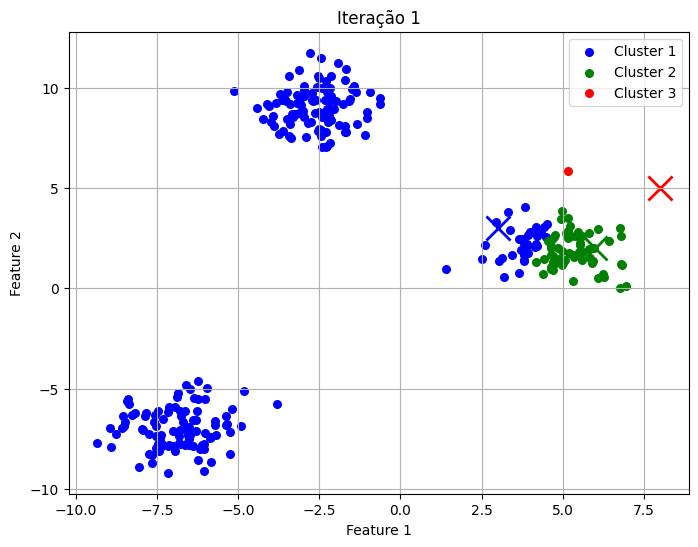

K-Means iteration 1/4


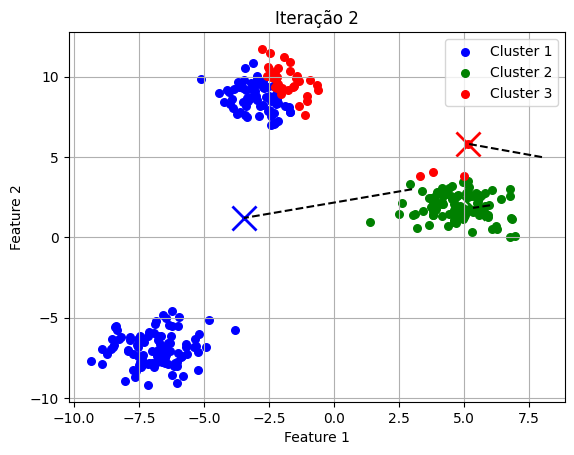

K-Means iteration 2/4


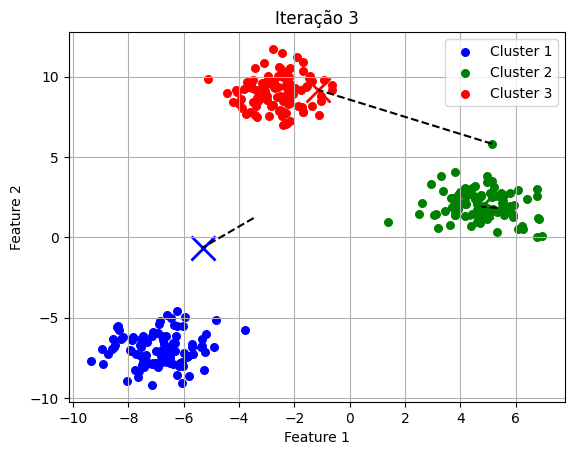

K-Means iteration 3/4


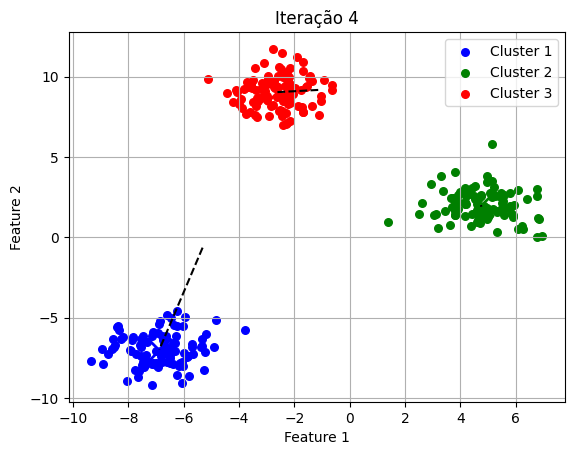

K-Means iteration 4/4


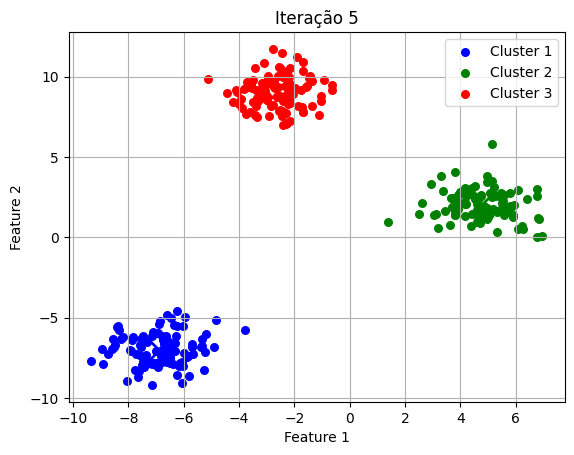

In [8]:
# Função para criar um conjunto de dados sintético
def load_data():
    # Cria um conjunto de dados com 300 pontos distribuídos em 3 clusters
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
    return X

# Funções K-Means já definidas acima (find_closest_centroids, compute_centroids, run_kMeans, plot_progress_kMeans)

# Carregar o conjunto de dados
X = load_data()

# Definir centróides iniciais
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Número de iterações
max_iters = 5

# Executar K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Inicialização Aleatória

Na prática, uma boa estratégia para inicializar os centróides é selecionar exemplos aleatórios do conjunto de treinamento.

Nesta parte do exercício, você deve entender como a função `kMeans_init_centroids` é implementada.
* O código primeiro embaralha aleatoriamente os índices dos exemplos (usando `np.random.permutation()`).
* Em seguida, ele seleciona os primeiros \(K\) exemplos com base na permutação aleatória dos índices.
* Isso permite que os exemplos sejam selecionados aleatoriamente sem o risco de selecionar o mesmo exemplo duas vezes.

In [9]:
def kMeans_init_centroids(X, K):
    # Embaralha aleatoriamente os índices dos exemplos em X
    randidx = np.random.permutation(X.shape[0])
    
    # Seleciona os primeiros K exemplos com base na permutação aleatória dos índices
    centroids = X[randidx[:K]]
    
    # Retorna os centróides inicializados aleatoriamente
    return centroids

K-Means iteration 0/4


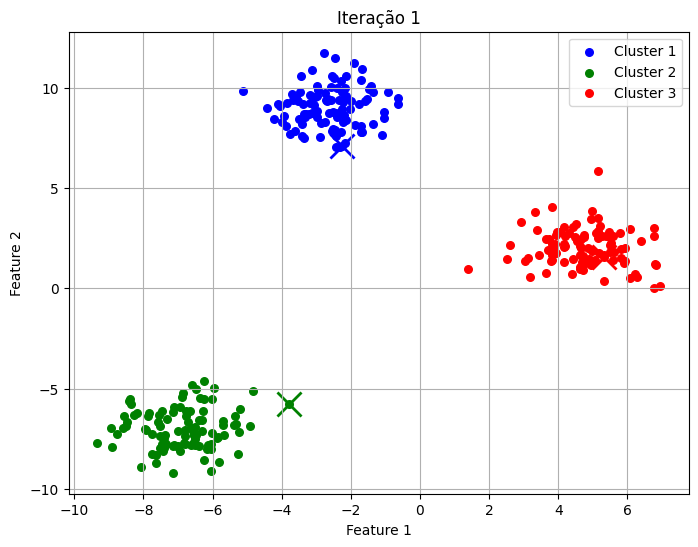

K-Means iteration 1/4


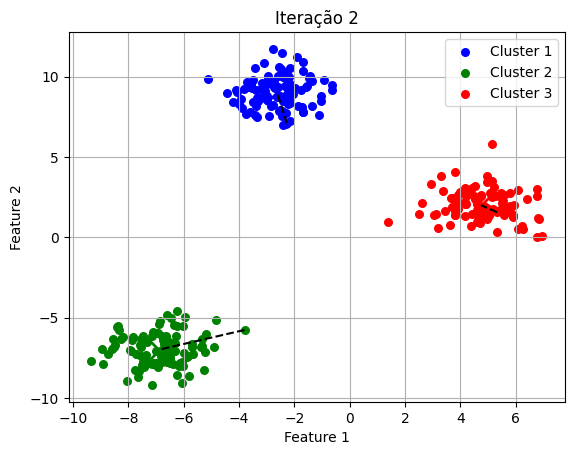

K-Means iteration 2/4


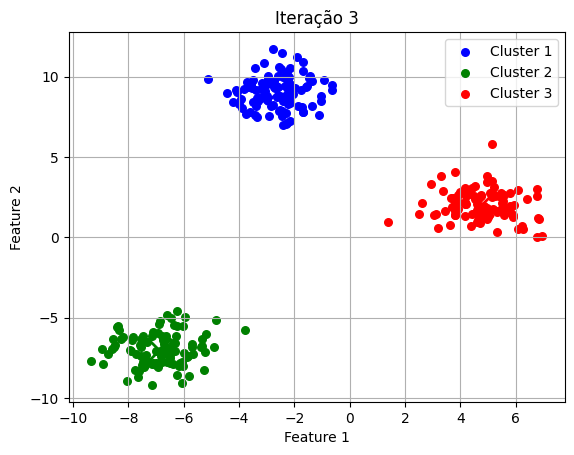

K-Means iteration 3/4


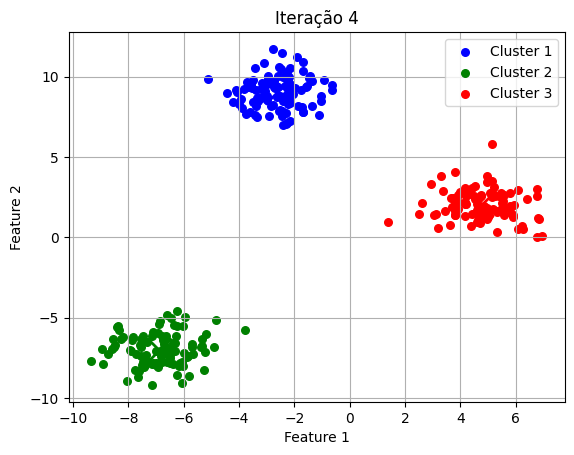

K-Means iteration 4/4


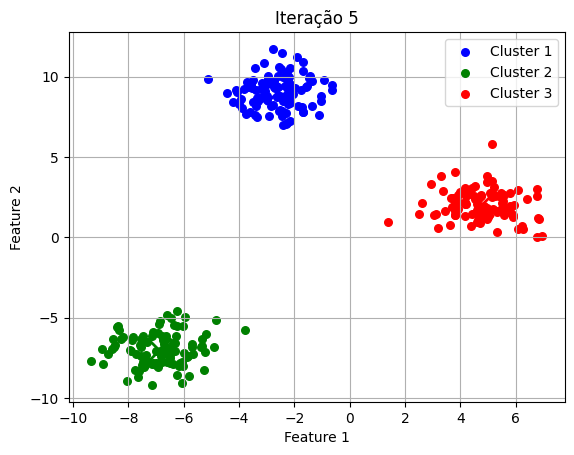

In [10]:
K = 3
max_iters = 5
initial_centroids = kMeans_init_centroids(X, K)
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="4"></a>
## 4 - Compressão de Imagem com K-means

Neste exercício, você aplicará o K-means para compressão de imagens.

* Em uma representação direta de cor de 24 bits de uma imagem, cada pixel é representado como três inteiros não assinados de 8 bits (variando de 0 a 255) que especificam os valores de intensidade de vermelho, verde e azul. Esta codificação é frequentemente referida como codificação RGB.
* Nossa imagem contém milhares de cores, e nesta parte do exercício, você reduzirá o número de cores para 16 cores.
* Fazendo essa redução, é possível representar (comprimir) a foto de maneira eficiente.
* Especificamente, você só precisa armazenar os valores RGB das 16 cores selecionadas, e para cada pixel na imagem, você agora precisa armazenar apenas o índice da cor naquela localização (onde apenas 4 bits são necessários para representar 16 possibilidades).

Nesta parte, você usará o algoritmo K-means para selecionar as 16 cores que serão usadas para representar a imagem comprimida.
* Concretamente, você tratará cada pixel na imagem original como um exemplo de dados e usará o algoritmo K-means para encontrar as 16 cores que melhor agrupam (cluster) os pixels no espaço tridimensional RGB.
* Depois de calcular os centróides dos clusters na imagem, você usará as 16 cores para substituir os pixels na imagem original.

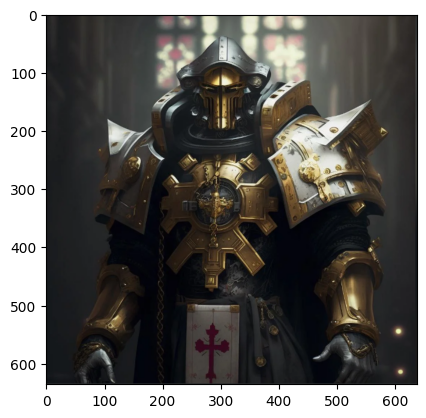

In [11]:
# Carregar a imagem
original_img = plt.imread('AI.png')

# Visualizar a imagem
plt.imshow(original_img)

In [12]:
# Verificando a dimensão da imagem
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (636, 638, 3)


Como você pode ver, isso cria uma matriz tridimensional `original_img` onde 
* os dois primeiros índices identificam uma posição de pixel e
* o terceiro índice representa vermelho, verde ou azul. 

Por exemplo, `original_img[50, 33, 2]` fornece a intensidade azul do pixel na linha 50 e na coluna 33.

#### Processando dados

Para chamar `run_kMeans`, você precisa primeiro transformar a matriz `original_img` em uma matriz bidimensional.

In [13]:
# Transformar a matriz original_img em uma matriz bidimensional
# A matriz resultante terá (número de pixels) linhas e 3 colunas (representando RGB)
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [14]:
# Número de cores (clusters) que queremos encontrar
K = 16

# Número máximo de iterações para o algoritmo K-Means
max_iters = 10

# Inicializar centróides aleatoriamente a partir dos pixels da imagem
initial_centroids = kMeans_init_centroids(X_img, K)

# Executar o algoritmo K-Means para encontrar os centróides e atribuições de cluster
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [15]:
# Exibir a forma de idx e os centróides mais próximos para os primeiros cinco elementos
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (405768,)
Closest centroid for the first five elements: [12 12 12 12  8]


In [28]:
# Função para plotar o resultado do K-Means no espaço RGB
def plot_kMeans_RGB(X, centroids, idx, K):
    # Define as cores para os diferentes clusters
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'grey', 'olive', 'cyan', 'magenta', 'lime']
    
    # Cria um gráfico 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plota cada cluster no espaço RGB
    for k in range(K):
        cluster_points = X[idx == k]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[k % len(colors)], label=f'Cluster {k+1}', s=10)
    
    # Plota os centróides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='x', s=100, linewidths=3, label='Centroids')
    
    # Define os rótulos dos eixos
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    
    plt.show()

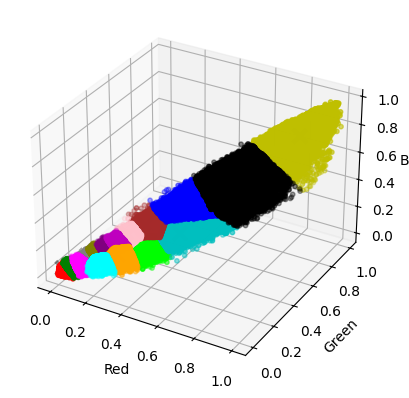

In [29]:
# Chama a função para plotar o resultado do K-Means no espaço RGB
plot_kMeans_RGB(X_img, centroids, idx, K)

Você pode visualizar as cores de cada um dos marcadores vermelhos (ou seja, os centróides) acima com a função abaixo. Você só verá essas cores quando gerar a nova imagem na próxima seção. O número abaixo de cada cor é o seu índice e esses são os números que você vê no array `idx`.

In [30]:
def show_centroid_colors(centroids):
    
    num_centroids = centroids.shape[0]
    
    # Cria uma figura e um conjunto de subplots
    fig, ax = plt.subplots(1, num_centroids, figsize=(num_centroids * 2, 2))
    
    for i in range(num_centroids):
        # Preenche o subplot com a cor do centróide
        ax[i].imshow([[centroids[i]]])
        # Remove os eixos
        ax[i].axis('off')
        # Adiciona o índice do centróide abaixo da cor
        ax[i].set_title(f'Idx {i}', fontsize=8)
    
    plt.show()

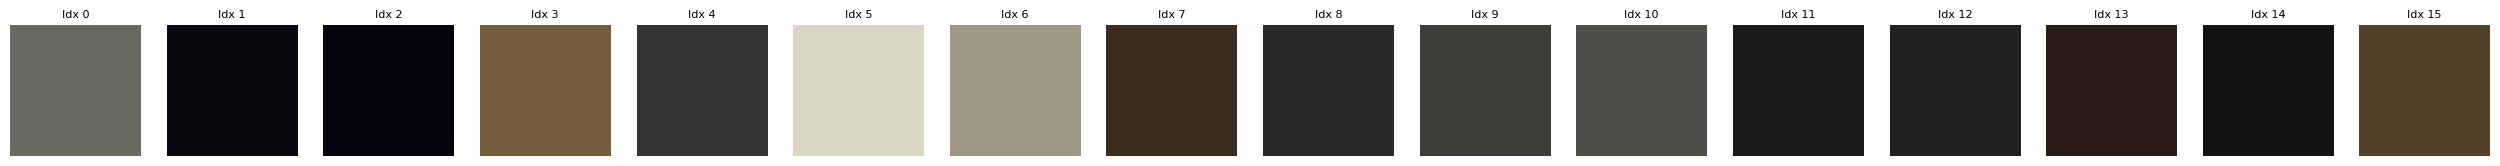

In [31]:
show_centroid_colors(centroids)

### Compactar a imagem

Depois de encontrar as $K=16$ cores principais para representar a imagem, agora você pode atribuir a posição de cada pixel ao seu centróide mais próximo usando a função `find_closest_centroids`.

* Isso permite representar a imagem original usando as atribuições de centróide de cada pixel.
* Observe que você reduziu significativamente o número de bits necessários para descrever a imagem.
    * A imagem original exigia 24 bits (ou seja, 8 bits x 3 canais na codificação RGB) para cada uma das posições de $ 636 \times 638 $ pixels, resultando em um tamanho total de $ 636 \times 638 \times 24 = 9.720.384 $ bits.
    * A nova representação requer algum armazenamento adicional na forma de um dicionário de 16 cores, cada uma das quais requer 24 bits, mas a imagem em si requer apenas 4 bits por posição de pixel.
    * O número final de bits usados é, portanto, $ 16 \times 24 + 636 \times 638 \times 4 = 1.625.600 $ bits, o que corresponde à compressão da imagem original por cerca de um fator de 6.


In [32]:
# Atribuir a posição de cada pixel ao seu centróide mais próximo usando a função find_closest_centroids
idx = find_closest_centroids(X_img, centroids)

# Substituir cada pixel pelo valor RGB do centróide mais próximo
X_recovered = centroids[idx, :]

# Remodelar a matriz bidimensional de volta ao formato original da imagem (altura, largura, RGB)
X_recovered = np.reshape(X_recovered, original_img.shape)

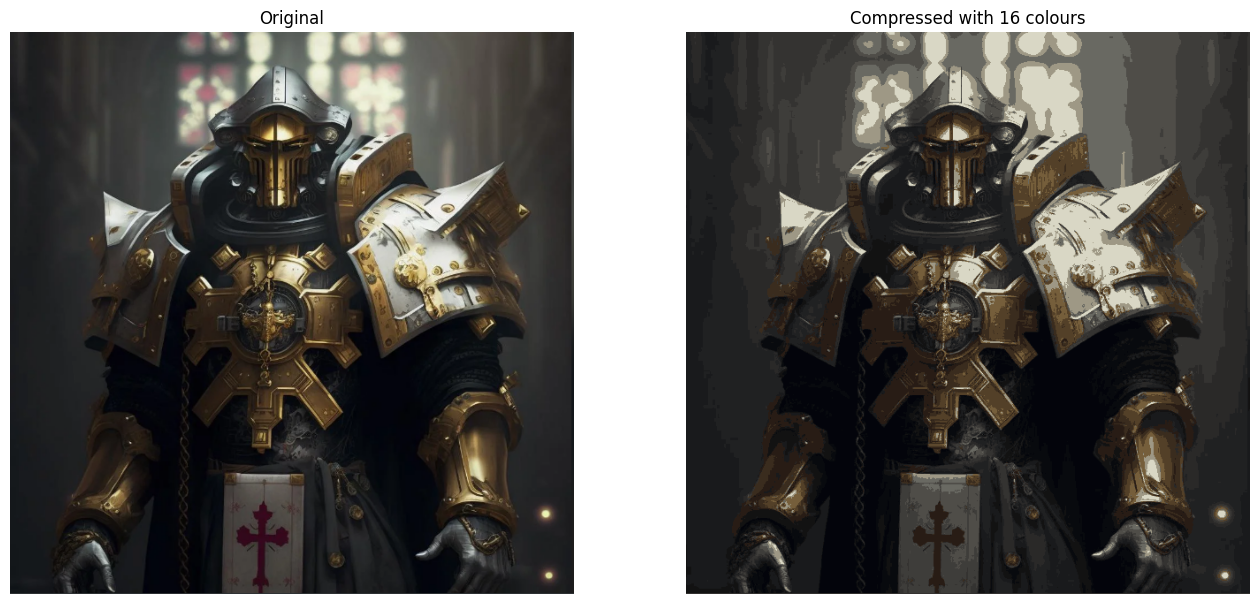

In [33]:
# Criar uma figura com dois subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16, 16))

# Desativar os eixos para a figura inteira
plt.axis('off')

# Exibir a imagem original no primeiro subplot
ax[0].imshow(original_img)
ax[0].set_title('Original')  # Definir o título do subplot
ax[0].set_axis_off()  # Desativar os eixos para o primeiro subplot

# Exibir a imagem comprimida no segundo subplot
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours' % K)  # Definir o título do subplot com o número de cores
ax[1].set_axis_off()  # Desativar os eixos para o segundo subplot

# Encontrando eventos incomuns

O algoritmo de detecção de anomalias é uma técnica de aprendizado de máquina não supervisionado usada para identificar eventos incomuns ou anômalos em conjuntos de dados sem rótulos. Esta abordagem é particularmente útil em aplicações críticas, como na manutenção e fabricação de motores de aeronaves, onde a confiabilidade é fundamental e as falhas podem ter consequências graves.

### Aplicação na Indústria de Aviação

Na fabricação de motores de aeronaves, cada motor que sai da linha de montagem pode ser avaliado com base em várias características ou "features". Por exemplo, pode-se medir a quantidade de calor gerado pelo motor (feature x1) e a intensidade da vibração (feature x2). Essas medições são essenciais, pois variações significativas em relação aos padrões normais podem indicar problemas potenciais que, se não identificados, podem levar a falhas críticas.

### Funcionamento do Algoritmo de Detecção de Anomalias

O processo começa com a coleta de dados normais dos motores — isto é, motores que funcionam adequadamente e não apresentam defeitos. Esses dados formam a base do que é considerado "normal" para um motor de aeronave em termos de calor e vibração.

Quando um novo motor é produzido, suas características são imediatamente comparadas com esse padrão normal. Se as características do novo motor caem dentro dos parâmetros esperados, ele é considerado normal. Porém, se os dados do novo motor mostram significativas discrepâncias em relação ao padrão — por exemplo, se ele gera muito mais calor ou vibração do que o típico —, ele é marcado como uma anomalia.

### Exemplo Prático

Imagine um gráfico onde cada motor é representado por uma cruz, indicando seus níveis normais de calor e vibração. Um motor recém-fabricado, cujos valores de calor e vibração são plotados no gráfico e se alinham bem com a maioria dos outros, é provavelmente seguro. No entanto, se o novo motor apresenta valores extremos que se distanciam significativamente do cluster principal de dados, ele é considerado anômalo. Isso sinaliza a necessidade de uma inspeção mais detalhada antes de ser liberado para instalação em uma aeronave.

## Estimação de Densidade

A técnica de detecção de anomalias através da estimação de densidade é um método eficaz para identificar eventos ou observações que se desviam significativamente do padrão normal em conjuntos de dados. Este método baseia-se na construção de um modelo probabilístico para as características observadas, que é usado para avaliar novos exemplos em busca de comportamentos anormais.

### Fundamentos da Estimação de Densidade

O processo começa com a definição de um modelo para a probabilidade das características observadas, $ P(x) $, no conjunto de dados de treinamento. O objetivo é determinar as regiões de alta e baixa probabilidade dentro do espaço de características:

1. **Modelagem de Probabilidade**: O algoritmo aprende a distribuição das características, como $ x_1 $ e $ x_2 $, em todo o conjunto de dados. Áreas densamente povoadas no espaço de características (onde muitos dados são agrupados) são consideradas de alta probabilidade, enquanto regiões com poucos dados são vistas como de baixa probabilidade.

2. **Classificação de Probabilidade**: O modelo identifica diferentes zonas de probabilidade. Por exemplo, pode-se visualizar isso como elipses concêntricas, onde a elipse interna representa a área de maior probabilidade e as elipses externas representam áreas de probabilidade progressivamente menor.

### Detecção de Anomalias com o Modelo

Quando um novo exemplo é apresentado ao modelo, o seguinte processo é aplicado para determinar se é uma anomalia:

1. **Cálculo da Probabilidade**: A probabilidade do novo exemplo, $ P(X_{\text{test}}) $, é calculada usando o modelo de densidade aprendido.

2. **Comparação com um Limiar ($\epsilon$)**: $ \epsilon $ é um valor de limiar definido que representa o corte abaixo do qual um exemplo é considerado anômalo. Se $ P(X_{\text{test}}) $ for menor que $ \epsilon $, o exemplo é marcado como uma anomalia.

3. **Avaliação de Anomalias**: 
   - Se $ X_{\text{test}} $ está numa região de baixa probabilidade (por exemplo, muito afastado das elipses centrais no modelo), e seu $ P(X_{\text{test}}) $ está abaixo de $ \epsilon $, então é considerado uma anomalia.
   - Se $ P(X_{\text{test}}) $ está acima ou igual a $ \epsilon $, o exemplo é considerado normal, indicando que suas características são consistentes com o comportamento típico observado nos dados de treinamento.

### Implementação Prática

Essa abordagem é particularmente útil em contextos industriais e técnicos, como na manutenção preditiva de motores de aeronaves. Ao aplicar a estimação de densidade, os engenheiros podem identificar motores que exibem características extremas de calor e vibração, o que poderia prenunciar falhas. A detecção precoce permite intervenções oportunas antes que problemas mais graves ocorram, aumentando a segurança e reduzindo custos de manutenção não planejada.

A detecção de anomalias é uma ferramenta valiosa empregada em uma variedade de setores, desde a prevenção de fraudes até o monitoramento de qualidade na fabricação e a manutenção de sistemas informáticos. Esta técnica é essencial para identificar comportamentos que se desviam significativamente do padrão normal, permitindo intervenções proativas para investigar e resolver potenciais problemas.

### Detecção de Anomalias em Prevenção de Fraudes

Em contextos como operações de websites ou atividades financeiras, a detecção de anomalias é fundamental para identificar fraudes. Por exemplo, em um site, características como frequência de login, quantidade de páginas visitadas, velocidade de digitação, e padrões de postagem em fóruns podem ser analisadas para estabelecer o comportamento típico de um usuário. Se um comportamento anômalo é detectado — como um padrão inusual de compras ou atividades de conta atípicas — isso pode indicar uma tentativa de fraude. Nestes casos, em vez de bloquear automaticamente a conta, medidas de segurança adicionais podem ser implementadas, como verificação de identidade através de SMS ou testes CAPTCHA, para confirmar a legitimidade do usuário.

### Aplicações Industriais

Na indústria de manufatura, a detecção de anomalias é usada para garantir a qualidade dos produtos fabricados. Desde motores de aeronaves até circuitos impressos e smartphones, a análise de características como vibrações, calor, ou desempenho elétrico pode indicar se um item recém-produzido apresenta comportamentos fora do comum. Detectar tais anomalias é crucial para prevenir o envio de produtos defeituosos aos clientes. Por exemplo, se um motor recém-fabricado mostra padrões de vibração atípicos, isso pode sinalizar um defeito que precisa ser investigado antes da entrega do produto.

### Monitoramento de Sistemas de TI

No gerenciamento de infraestruturas de TI, como data centers e clusters de servidores, a detecção de anomalias é utilizada para monitorar a saúde e o desempenho das máquinas. Variáveis como uso de memória, número de acessos ao disco por segundo, e carga de CPU são monitoradas. Relações entre essas variáveis também podem fornecer insights valiosos; uma mudança abrupta nesses padrões pode indicar falhas de hardware, problemas de segurança como invasões, ou outros problemas técnicos que requerem atenção imediata.

# Distribuição gaussiana (normal)

A distribuição gaussiana, também conhecida como distribuição normal, é uma das mais fundamentais em estatística e aprendizado de máquina para modelar fenômenos que apresentam variação natural em torno de uma média. Essa distribuição é amplamente utilizada para entender características e comportamentos em diversas áreas, inclusive na detecção de anomalias.

### Conceitos Básicos da Distribuição Gaussiana

**Forma e Características**:
- A distribuição gaussiana é caracterizada pela sua forma de sino, onde o ponto mais alto da curva representa a média ($\mu$) dos dados.
- A dispersão dos dados ao redor da média é descrita pelo desvio padrão ($\sigma$), e a variância ($\sigma^2$) é simplesmente o quadrado do desvio padrão.
- Matematicamente, a probabilidade de um evento $x$ em uma distribuição normal é dada por:
  
  $$
  P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
  $$

  Essa fórmula mostra que $P(x)$ diminui conforme $x$ se afasta da média ($\mu$), e essa diminuição é mais rápida quanto menor o $\sigma$ (desvio padrão).

### Aplicação na Detecção de Anomalias

**Modelagem de Comportamento Normal**:
- Em contextos como monitoramento de sistemas ou análise de transações financeiras, a distribuição gaussiana pode ser usada para modelar o comportamento esperado ou "normal".
- Por exemplo, em um sistema de monitoramento de saúde de máquinas, características como temperatura ou vibração podem ser modeladas como variáveis gaussianas. Valores que caem dentro de um intervalo de desvios padrão esperado são considerados normais.

**Identificação de Anomalias**:
- Um valor observado que se desvia significativamente dos parâmetros normais ($\mu$ e $\sigma$) pode ser indicativo de uma anomalia.
- Na prática, se um novo valor medido (por exemplo, temperatura de um motor) tem uma probabilidade extremamente baixa sob o modelo gaussiano estabelecido, esse valor pode ser considerado uma anomalia. Isso geralmente é feito usando um limiar específico, como valores que caem fora de 3 desvios padrão da média.

### Visualização e Interpretação

**Histograma de Dados**:
- Se você coletar uma grande quantidade de dados de um fenômeno que segue uma distribuição normal e plotar um histograma desses dados, você verá a forma de sino emergir claramente.
- Esta visualização ajuda a confirmar se a distribuição normal é um modelo adequado para os dados em questão e pode revelar se há desvios significativos que precisam ser investigados como possíveis anomalias.

### Entendendo os Parâmetros da Distribuição Gaussiana

A média ($\mu$) e o desvio padrão ($\sigma$) são cruciais para definir a forma da curva gaussiana:

1. **Mudanças na Média ($\mu$)**: Alterar a média da distribuição desloca a curva ao longo do eixo horizontal sem alterar sua forma. Se $\mu$ é ajustado para um valor mais alto, a curva se desloca para a direita; um valor mais baixo move a curva para a esquerda.

2. **Mudanças no Desvio Padrão ($\sigma$)**:
   - Reduzir $\sigma$ resulta em uma curva mais estreita e alta, concentrando mais a distribuição em torno da média. Isso indica que a maioria dos dados está muito próxima da média.
   - Aumentar $\sigma$ produz uma curva mais ampla e baixa, indicando maior dispersão dos dados em torno da média.

### Aplicação na Detecção de Anomalias

Para aplicar a distribuição gaussiana na detecção de anomalias, primeiro estimamos os parâmetros $\mu$ e $\sigma^2$ (variação) a partir dos dados de treinamento:

- **Estimação de $\mu$**: A média é calculada como a média aritmética de todos os exemplos de treinamento.
  
  $$
  \mu = \frac{1}{m} \sum_{i=1}^{m} x_i
  $$

- **Estimação de $\sigma^2$**: A variação é a média das diferenças quadradas entre cada exemplo de treinamento e a média.
  
  $$
  \sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^2
  $$

### Detecção de Anomalias com a Distribuição Estimada

Após a estimativa dos parâmetros, qualquer novo exemplo é avaliado com base na probabilidade fornecida pela distribuição gaussiana. Se a probabilidade ($p(x)$) de um novo exemplo é significativamente baixa (menor que um limiar pré-estabelecido), isso sugere que o exemplo é anômalo.

- Exemplos com $p(x)$ alta estão próximos da média e são considerados normais.
- Exemplos com $p(x)$ baixa estão distantes da média e podem ser considerados anômalos.

### Generalização para Múltiplas Características

Embora o exemplo acima considere apenas uma característica, na prática, a detecção de anomalias frequentemente envolve múltiplas características. Nesses casos, a abordagem é similar, mas utiliza a distribuição gaussiana multivariada, que considera as covariâncias entre as características, permitindo uma análise mais complexa e precisa.

# Algoritmo de detecção de anomalias

A detecção de anomalias utilizando a distribuição gaussiana em contextos multidimensionais é um processo complexo, mas fundamental para monitorar e analisar comportamentos em diversos setores, como na manutenção de motores de aeronaves. O método estatístico se baseia na estimativa de densidade para prever a probabilidade de vetores de características, facilitando a identificação de eventos que desviam significativamente dos padrões normais.

### Construção do Modelo de Detecção de Anomalias

**Estimativa de Densidade Multidimensional**:
- Em um conjunto de dados de treinamento, cada exemplo $ x $ é representado por um vetor com $ n $ características (ex: calor e vibração de um motor).
- Para modelar a probabilidade de um vetor de características $ x $, assumimos que cada característica $ x_i $ é independente das outras. Isso simplifica o modelo ao permitir que a probabilidade total do vetor $ x $ seja o produto das probabilidades de suas características individuais:
  
  $$
  P(x) = P(x_1) \times P(x_2) \times \dots \times P(x_n)
  $$

**Parâmetros da Distribuição**:
- Cada característica $ x_i $ é modelada por uma distribuição gaussiana própria, com média $ \mu_i $ e variância $ \sigma_i^2 $. 
- Para a característica $ x_1 $ (calor), por exemplo, estimamos $ \mu_1 $ e $ \sigma_1^2 $ a partir dos dados de treinamento, aplicando:

  $$
  \mu_1 = \frac{1}{m} \sum_{i=1}^{m} x_{i1}, \quad \sigma_1^2 = \frac{1}{m} \sum_{i=1}^{m} (x_{i1} - \mu_1)^2
  $$

  E repetimos para todas as características até $ x_n $.

### Aplicação Prática na Detecção de Anomalias

**Identificação de Comportamentos Anômalos**:
- Com o modelo estabelecido, novos exemplos são avaliados calculando a probabilidade $ P(x) $ do vetor de características.
- Um exemplo é considerado anômalo se $ P(x) $ for extremamente baixa, indicando que o evento é altamente improvável dado o modelo de distribuição normal aprendido. Isso pode sinalizar um problema potencial, como um motor de avião funcionando fora dos parâmetros normais de calor e vibração.

### Exemplo de Cálculo de Probabilidade Combinada

Suponha que a probabilidade de um motor apresentar calor excessivo seja de 1/10 e de vibração excessiva seja de 1/20. A probabilidade de ambos ocorrerem simultaneamente em um motor, assumindo independência, seria:

$$
P(\text{calor excessivo e vibração excessiva}) = \frac{1}{10} \times \frac{1}{20} = \frac{1}{200}
$$

Este cálculo mostra como eventos individuais raros combinados podem ser ainda mais raros, enfatizando a utilidade de modelar cada característica separadamente para a detecção eficaz de anomalias.

### Etapa 1: Seleção de Características

A primeira etapa no desenvolvimento de um sistema de detecção de anomalias é identificar as características ($x_i$) que são indicativas de comportamento anômalo. Essas características devem ser relevantes para o contexto específico em que o sistema será aplicado. Por exemplo, na manutenção de motores de aeronaves, características como temperatura e vibração são escolhidas por serem indicativos de falhas potenciais.

### Etapa 2: Ajuste dos Parâmetros

Após a seleção das características, o próximo passo é ajustar os parâmetros da distribuição gaussiana para cada característica:

- **Média ($\mu$)**: A média para cada característica $j$ é calculada como a média aritmética de todos os valores dessa característica no conjunto de dados de treinamento.

  $$
  \mu_j = \frac{1}{m} \sum_{i=1}^{m} x_{ij}
  $$

- **Variância ($\sigma_j^2$)**: A variância é calculada como a média das diferenças quadradas entre cada valor da característica e a média $\mu_j$.

  $$
  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m} (x_{ij} - \mu_j)^2
  $$

Esses parâmetros são essenciais para modelar a probabilidade de cada característica sob a suposição de que elas seguem uma distribuição gaussiana.

### Etapa 3: Detecção de Anomalias

Uma vez que os parâmetros são ajustados, qualquer novo exemplo pode ser avaliado para determinar se é anômalo:

- **Cálculo de Probabilidade**: A probabilidade de um novo exemplo ($x$) é o produto das probabilidades de todas as suas características, cada uma modelada por sua distribuição gaussiana correspondente.

  $$
  P(x) = \prod_{j=1}^{n} \frac{1}{\sqrt{2\pi \sigma_j^2}} \exp\left(-\frac{(x_j - \mu_j)^2}{2\sigma_j^2}\right)
  $$

- **Avaliação Contra um Limiar ($\epsilon$)**: Se $P(x)$ for menor que um limiar $\epsilon$ pré-definido, o exemplo é marcado como anômalo. Esse limiar é escolhido com base no nível de sensibilidade desejado e na tolerância ao risco de falsos positivos.

### Intuição por Trás do Algoritmo

O sistema de detecção de anomalias identifica um exemplo como anômalo se uma ou mais de suas características estiverem substancialmente fora do padrão normal observado no conjunto de treinamento. Se mesmo uma única característica apresentar uma probabilidade extremamente baixa, isso reduzirá significativamente $P(x)$, levando à classificação do exemplo como anômalo.

### Exemplo dos Parâmetros Estatísticos

**Cálculo dos Parâmetros**:
- Para a característica $x_1$, a média ($\mu_1$) calculada é 5 e o desvio padrão ($\sigma_1$) é 2. Isso indica uma variação relativamente ampla dos valores em torno da média.
- Para $x_2$, a média ($\mu_2$) é 3 com um desvio padrão ($\sigma_2$) de 1, mostrando uma variação menor.

Esses parâmetros moldam as distribuições gaussianas individuais para cada característica, refletindo como os dados estão distribuídos em cada dimensão.

### Visualização em 3D da Probabilidade Combinada

Ao combinar as probabilidades $P(x_1)$ e $P(x_2)$, podemos visualizar uma superfície 3D onde a altura em qualquer ponto é o produto $P(x_1) \times P(x_2)$. Esta superfície ajuda a visualizar quão prováveis são diferentes combinações de $x_1$ e $x_2$:

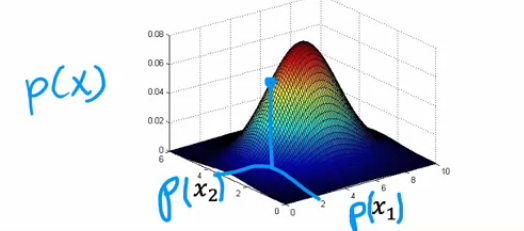

- Valores próximos às médias de $x_1$ e $x_2$ resultam em alturas maiores na superfície, indicando uma alta probabilidade.
- Valores distantes das médias tendem a resultar em alturas menores, indicando baixa probabilidade e, portanto, maior potencial para serem anomalias.

### Avaliação de Exemplos de Teste

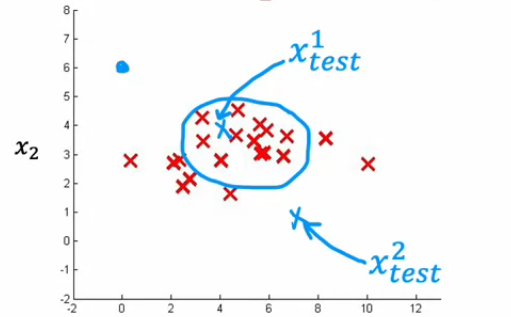

**Aplicação do Limiar ($\epsilon$)**:
- O limiar $\epsilon$ é definido como 0.02 para determinar se um exemplo é considerado anômalo.
- Para o primeiro exemplo de teste ($x_{\text{test 1}}$), $P(x)$ é 0.4, significativamente maior que $\epsilon$, indicando que este exemplo é normal.
- Para o segundo exemplo de teste ($x_{\text{test 2}}$), $P(x)$ é 0.0021, bem abaixo de $\epsilon$, marcando-o como uma provável anomalia.

### Intuição por Trás dos Resultados

Este processo destaca a capacidade do sistema de detecção de anomalias em distinguir entre comportamentos normais e atípicos. $x_{\text{test 1}}$ é considerado normal porque suas características estão próximas às comuns no conjunto de treinamento. Por outro lado, $x_{\text{test 2}}$ é identificado como anômalo porque suas características estão muito distantes das observações típicas, fazendo com que sua probabilidade combinada seja extremamente baixa.

# Desenvolvendo e avaliando um sistema de detecção de anomalias

Desenvolver um sistema eficaz de detecção de anomalias envolve uma série de práticas estratégicas que podem melhorar significativamente o desempenho do sistema. Uma das abordagens mais críticas é a avaliação contínua durante o desenvolvimento, o que permite ajustes rápidos e fundamentados. Aqui estão algumas dicas práticas sobre como implementar e aprimorar um sistema de detecção de anomalias:

## Seleção e Ajuste de Características

Ao desenvolver um algoritmo de aprendizado, a escolha das características ($x_i$) é crucial. É importante experimentar diferentes características que podem indicar comportamentos anômalos. Além disso, ajustar os parâmetros do algoritmo, como o limiar de decisão ($\epsilon$), é fundamental para otimizar a detecção:

- **Experimentação**: Teste diferentes características e veja como elas influenciam a capacidade de detectar anomalias.
- **Ajuste de Parâmetros**: Modificar o valor de $\epsilon$ pode ajudar a refinar a sensibilidade do algoritmo, equilibrando entre falsos positivos e falsos negativos.

## Utilização de Dados Rotulados para Avaliação

Embora a detecção de anomalias frequentemente utilize dados não rotulados, incorporar um conjunto de dados rotulados pode ser extremamente benéfico:

- **Dados Rotulados**: Utilize um pequeno conjunto de exemplos previamente conhecidos como anômalos (rotulados com $y = 1$) e normais (rotulados com $y = 0$) para validar e ajustar o sistema.
- **Conjuntos de Validação e Teste**: Divida os dados rotulados em conjuntos de validação cruzada e de teste. Esses conjuntos devem incluir tanto exemplos normais quanto anômalos para testar a eficácia do algoritmo.

## Avaliação Numérica Real

Implementar uma avaliação numérica real é crucial para medir objetivamente o desempenho do algoritmo:

- **Métricas de Desempenho**: Utilize métricas como precisão, recall, e a área sob a curva ROC (AUC) para avaliar o desempenho do algoritmo. Essas métricas podem ajudar a determinar se uma mudança específica melhora ou piora o sistema.
- **Feedback Rápido**: A capacidade de obter um feedback numérico rápido permite fazer ajustes iterativos no algoritmo, facilitando a otimização contínua.

## Iteração e Melhoria Contínua

O desenvolvimento de um sistema de detecção de anomalias é um processo iterativo:

- **Testes Iterativos**: Continuamente teste e refine o algoritmo com base no feedback dos conjuntos de validação e teste.
- **Ajustes Baseados em Desempenho**: Faça ajustes no sistema com base em análises estatísticas e feedback do desempenho real do modelo em ambientes de teste.

## Prática e Realidade

Reconheça que, na prática, alguns exemplos anômalos podem ser erroneamente rotulados como normais. O sistema deve ser robusto o suficiente para lidar com essas inconsistências sem grande degradação no desempenho.

### Estruturação dos Conjuntos de Dados

**1. Divisão do Conjunto de Dados:**
- **Conjunto de Treinamento:** Composto principalmente por motores considerados "bons" ou normais. Por exemplo, 6.000 motores sem defeitos podem compor este conjunto. A inclusão acidental de algumas anomalias não é problemática e pode até ajudar o modelo a se tornar mais robusto.
- **Conjunto de Validação:** Inclui tanto motores bons quanto uma quantidade conhecida de motores defeituosos (anomalias). Neste exemplo, 2.000 motores bons e 10 anomalias são usados para ajustar parâmetros como o limiar de decisão ($\epsilon$).
- **Conjunto de Teste:** Similar ao de validação, contém motores bons e anomalias para avaliar a eficácia final do modelo após o ajuste de parâmetros. Este conjunto é crucial para testar a generalização do modelo em dados não vistos durante o treinamento.

**2. Ajuste de Parâmetros e Características:**
- A partir dos dados do conjunto de validação, o valor de $\epsilon$ é ajustado para maximizar a detecção de anomalias enquanto minimiza falsos positivos entre os motores bons. As características ($x_j$) também podem ser ajustadas para melhorar a detecção.

### Uso Prático e Avaliação

**1. Avaliação com o Conjunto de Validação:**
- O desempenho do algoritmo no conjunto de validação é usado para refinar $\epsilon$ e outras configurações. Este passo é iterativo e busca um equilíbrio entre sensibilidade e especificidade na detecção de anomalias.

**2. Teste Final com o Conjunto de Teste:**
- Após os ajustes, o conjunto de teste é usado para avaliar como o modelo performa em condições "reais", isto é, em dados que não foram usados no ajuste dos parâmetros. Este passo é crucial para garantir que o modelo não está superajustado aos dados de validação.

### Considerações Alternativas

Em situações onde os dados de anomalias são extremamente limitados, pode ser prático combinar os conjuntos de validação e teste:

- **Conjunto Único de Validação/Teste:** Quando os dados de anomalias são muito escassos, todos os exemplos de anomalias podem ser colocados no conjunto de validação, junto com uma porção dos dados normais. Isso permite um ajuste intensivo, mas também aumenta o risco de superajuste às peculiaridades desse conjunto combinado.

### Riscos e Precauções

- **Risco de Superajuste:** Sem um conjunto de teste separado, há um risco maior de o modelo estar excessivamente ajustado ao conjunto de validação, o que pode não refletir sua performance em novos dados.
- **Decisões de Projeto:** A escolha entre usar um conjunto de teste separado ou combinado com o de validação deve considerar a quantidade de dados disponíveis, especialmente o número de exemplos anômalos.

### Passo a Passo para Avaliação do Modelo

**1. Ajuste do Modelo no Conjunto de Treinamento:**
- Utilize os 6.000 exemplos de motores bons para ajustar o modelo de probabilidade $ P(x) $, que descreve como as características dos motores normais são distribuídas.

**2. Predição em Conjuntos de Validação/Teste:**
- Para cada exemplo no conjunto de validação ou teste, calcule $ P(x) $.
- Classifique o exemplo como anômalo ($ y = 1 $) se $ P(x) $ for menor que o limiar $ \epsilon $, e como normal ($ y = 0 $) se $ P(x) $ for maior ou igual a $ \epsilon $.

### Métricas de Avaliação

Dada a distribuição desigual dos exemplos (por exemplo, 10 anômalos contra 2.000 normais), métricas tradicionais como a acurácia podem não refletir adequadamente o desempenho do modelo. Portanto, é recomendável considerar métricas que sejam mais informativas para dados desbalanceados:

**1. Taxas de Verdadeiros e Falsos Positivos/Negativos:**
- **Verdadeiro Positivo (VP)**: Anomalias corretamente identificadas como tal.
- **Falso Positivo (FP)**: Motores normais erroneamente identificados como anômalos.
- **Falso Negativo (FN)**: Anomalias não detectadas, erroneamente classificadas como normais.
- **Verdadeiro Negativo (VN)**: Motores normais corretamente identificados.

**2. Precisão, Recall e F1-Score:**
- **Precisão**: Proporção de identificações corretas de anomalias em relação ao total de identificações de anomalias ($ \text{VP} / (\text{VP} + \text{FP}) $).
- **Recall (Sensibilidade)**: Proporção de anomalias corretamente identificadas em relação ao total de anomalias reais ($ \text{VP} / (\text{VP} + \text{FN}) $).
- **F1-Score**: Média harmônica de precisão e recall, fornecendo um balanço entre essas métricas ($ 2 \times (\text{Precisão} \times \text{Recall}) / (\text{Precisão} + \text{Recall}) $).

### Ajuste do Limiar $ \epsilon $

A escolha de $ \epsilon $ é crítica para o desempenho do sistema. Utilizando o conjunto de validação:

- Ajuste $ \epsilon $ para maximizar o desempenho conforme medido pelo F1-Score, que é particularmente útil em situações de desequilíbrio entre classes.
- Experimente diferentes valores de $ \epsilon $ e avalie como cada ajuste impacta as métricas de verdadeiros positivos e falsos positivos.

# Detecção de anomalias vs. aprendizagem supervisionada

A decisão entre utilizar detecção de anomalias ou aprendizado supervisionado para identificar comportamentos anormais em conjuntos de dados pode ser complexa, especialmente quando se considera a natureidade e a diversidade das anomalias. Vamos explorar quando cada abordagem é mais apropriada e como escolher a melhor técnica baseada nas características dos dados e nos objetivos da análise.

### Detecção de Anomalias

**Quando Usar:**
- **Poucos Exemplos Positivos:** A detecção de anomalias é particularmente eficaz quando existem muito poucos exemplos positivos (por exemplo, 0-20), tornando difícil cobrir todas as possíveis variações de anomalias.
- **Muitos Exemplos Negativos:** É comum ter um grande volume de dados representando o comportamento "normal", o que facilita a modelagem do que é considerado padrão ou esperado.
- **Tipos Diversos de Anomalias:** Ideal quando as anomalias podem assumir muitas formas diferentes e quando novos tipos de anomalias podem surgir, o que é comum em setores como manufatura de aeronaves ou detecção de fraudes financeiras.

**Vantagens:**
- A detecção de anomalias foca em modelar o comportamento normal e identificar desvios significativos deste padrão, o que é útil em situações onde anomalias futuras podem não se assemelhar a nenhum exemplo passado conhecido.

### Aprendizado Supervisionado

**Quando Usar:**
- **Equilíbrio de Exemplos Positivos e Negativos:** Mais eficaz quando há um número substancial de exemplos tanto positivos quanto negativos, permitindo que o modelo aprenda características distintivas de ambos.
- **Anomalias Conhecidas e Recorrentes:** Se as anomalias são relativamente consistentes ao longo do tempo e similares às já observadas anteriormente, como no caso de spam em e-mails.

**Vantagens:**
- Em contextos onde as anomalias são bem definidas e recorrentes, o aprendizado supervisionado pode aprender e generalizar com base nos exemplos de treinamento, antecipando anomalias futuras que se assemelham às passadas.

### Escolhendo Entre Detecção de Anomalias e Aprendizado Supervisionado

**1. Natureza das Anomalias:**
- Se as anomalias são muito variadas e imprevisíveis, ou se novos tipos podem surgir sem semelhança com as anteriores, a detecção de anomalias é mais adequada.
- Se as anomalias são consistentes e previsíveis, baseadas em tendências anteriores, o aprendizado supervisionado é recomendado.

**2. Disponibilidade de Dados:**
- A detecção de anomalias é vantajosa quando os exemplos positivos são escassos ou incompletos.
- O aprendizado supervisionado requer uma quantidade suficiente de exemplos positivos bem definidos para treinamento eficaz.

**3. Objetivos da Detecção:**
- Para identificação de novos padrões anômalos não vistos anteriormente, a detecção de anomalias é ideal.
- Para a identificação contínua de padrões conhecidos e monitoramento de conformidade, o aprendizado supervisionado é mais eficaz.

# Escolhendo quais recursos usar

Na construção de algoritmos de detecção de anomalias, a seleção adequada de características é extremamente importante. Diferentemente da aprendizagem supervisionada, onde o sinal supervisionado — ou seja, as etiquetas fornecidas — ajuda o algoritmo a identificar quais características ignorar ou como reescalar as características para tirar o melhor proveito delas, a detecção de anomalias depende exclusivamente de dados não rotulados. Isso torna mais desafiador para o algoritmo discernir quais características são irrelevantes.

Um método eficaz para melhorar o desempenho dos algoritmos de detecção de anomalias é garantir que as características sejam aproximadamente gaussianas. Se uma característica não é gaussiana, pode-se transformá-la para que se aproxime mais de uma distribuição gaussiana. Por exemplo, se você tem uma característica X, uma prática comum é plotar um histograma dessa característica para analisar sua distribuição. Se a distribuição não é simétrica, como a curva em forma de sino da distribuição gaussiana, transformações como o logaritmo (log) de X podem ajudar a tornar a distribuição mais gaussiana.

Além do logaritmo, outras transformações podem incluir operações como a raiz quadrada ou transformações exponenciais de uma característica, ajustando-a para melhor se adequar ao modelo gaussiano. Experimentar com diferentes valores para ajustes adicionais, como adicionar uma constante antes de aplicar o logaritmo, também é uma prática comum para refinar a adequação da característica ao modelo gaussiano. Esse processo de tentativa e erro com diferentes transformações e valores ajuda a maximizar o desempenho na detecção de anomalias.

Ao analisar uma característica X, você pode começar plotando um histograma utilizando um código que incrementa o número de divisões (bins) do histograma para 50, permitindo uma visualização mais detalhada da distribuição. Ajustes visuais adicionais, como a mudança de cor do histograma, também podem ser facilmente implementados. A partir daí, você pode explorar diferentes transformações da característica para ver qual se aproxima mais de uma distribuição gaussiana.

Por exemplo, ao tentar a transformação de X elevado à potência de 0,5, você verifica a forma do histograma resultante. Se ainda não parecer suficientemente gaussiano, pode-se ajustar o parâmetro da potência, testando, por exemplo, X elevado a 0,4, que pode revelar uma forma mais próxima da curva gaussiana desejada.

Além das transformações de potência, uma transformação comum é o logaritmo de X. No entanto, ao aplicar o logaritmo, você pode encontrar problemas com valores zero, pois o logaritmo de zero é indefinido. Uma solução comum é adicionar um pequeno valor, como 0,001, a X antes de aplicar o logaritmo, evitando valores negativos infinitos e permitindo uma transformação mais suave.

Experimentar diferentes parâmetros em tempo real no Jupyter Notebook permite uma análise imediata dos efeitos das transformações, ajudando a encontrar a configuração que melhor normaliza a distribuição dos dados. Embora a literatura de aprendizado de máquina ofereça métodos para medir quão próximas as distribuições estão de serem gaussianas, na prática, muitas vezes é suficiente experimentar algumas configurações e escolher aquela que visualmente parece mais adequada.

Por fim, é crucial lembrar que qualquer transformação aplicada ao conjunto de treinamento deve ser igualmente aplicada aos conjuntos de validação cruzada e de teste para garantir a consistência e a validade do modelo.

Após garantir que os dados de entrada se aproximem de uma distribuição gaussiana, a próxima etapa na otimização de algoritmos de detecção de anomalias é realizar uma análise de erros, especialmente se o algoritmo não apresentar bons resultados no conjunto de validação cruzada. Este processo envolve examinar onde e por que o algoritmo está falhando ou cometendo erros e usar essas informações para aprimorar o modelo.

O objetivo central da detecção de anomalias é que a probabilidade $ P(X) $ seja alta para exemplos normais (superior ou igual a um limiar $ \epsilon $) e baixa para exemplos anômalos (inferior a $ \epsilon $). Um problema comum que pode surgir é que $ P(X) $ pode ser alto tanto para exemplos normais quanto para anômalos, o que dificulta a distinção entre os dois. Isso pode ocorrer quando um exemplo anômalo se assemelha muito aos exemplos normais do conjunto de treinamento, fazendo com que o algoritmo falhe em identificá-lo como anômalo.

Nessa situação, uma estratégia útil é analisar especificamente o exemplo que foi incorretamente classificado como normal para entender o que o caracteriza como anômalo. Essa análise pode revelar a necessidade de incluir uma nova característica no modelo. Por exemplo, suponha que estamos detectando comportamentos fraudulentos e a característica $ X_1 $ representa o número de transações feitas por um usuário. Se um usuário anômalo realiza um número de transações semelhante ao de usuários normais, essa característica não ajudará a distinguir entre comportamentos normais e fraudulentos.

No entanto, se observarmos que o usuário anômalo possui uma velocidade de digitação excepcionalmente rápida, isso poderia ser uma nova característica $ X_2 $, como a "velocidade de digitação". Ao adicionar $ X_2 $ ao modelo e plotar os dados utilizando tanto $ X_1 $ quanto $ X_2 $, podemos observar que $ X_2 $ destaca esse usuário como anômalo. Isso facilita para o algoritmo de detecção de anomalias identificar o usuário como anômalo, pois o novo modelo com $ X_2 $ pode ajustar uma distribuição gaussiana que atribui alta probabilidade a pontos nesta nova região característica.

Expandindo a abordagem de desenvolvimento de sistemas de detecção de anomalias, vamos considerar um exemplo prático em um centro de dados, onde monitoramos computadores para identificar comportamentos atípicos que possam indicar falhas de hardware ou invasões de segurança.

Nesse cenário, escolheríamos características que possam apresentar valores anormalmente altos ou baixos em situações de anomalia. Inicialmente, poderíamos utilizar características como $ X_1 $ para o uso de memória, $ X_2 $ para o número de acessos ao disco por segundo, carga da CPU e volume de tráfego de rede. Essas características são fundamentais para detectar padrões normais e anormais de funcionamento dos computadores.

Ao treinar o algoritmo com essas características, é possível que algumas anomalias sejam detectadas, enquanto outras não. Uma estratégia eficaz para melhorar a detecção é a criação de novas características a partir da combinação das existentes. Por exemplo, se um computador apresenta uma carga de CPU muito alta, mas um volume de tráfego de rede baixo — o que seria atípico em um ambiente que transmite vídeos, onde uma alta carga de CPU geralmente corresponde a um alto tráfego de rede — essa combinação pode ser indicativa de uma anomalia.

Neste caso, poderíamos introduzir uma nova característica, $ X_5 $, que seria a razão entre a carga da CPU e o volume de tráfego de rede. Esta nova característica poderia ajudar o algoritmo a identificar esse comportamento como anômalo, especialmente se a relação é significativamente alta ou baixa comparada com o que é típico para outras máquinas em condições normais.

Outra possibilidade seria considerar características transformadas, como o quadrado da carga da CPU dividido pelo volume de tráfego de rede. Essas transformações podem ajudar a exagerar as diferenças quando um comportamento verdadeiramente anômalo ocorre, tornando mais fácil para o algoritmo de detecção de anomalias identificar essas situações.

Brincando com diferentes combinações e transformações dessas características, podemos refinar o modelo para que $ P(X) $ mantenha-se alto para exemplos normais, mas torne-se baixo para as anomalias no conjunto de validação cruzada. Esta abordagem iterativa permite ajustar continuamente o sistema para melhorar sua precisão e eficácia na identificação de comportamentos anômalos em cenários complexos e dinâmicos como os de um centro de dados.

# Exemplo: Detecção de Anomalias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Detecção de Anomalias


### Declaração do Problema

Neste exercício, você implementará um algoritmo de detecção de anomalias para detectar comportamentos anômalos em servidores de computador.

O dataset contém duas características:
   * throughput (mb/s) e
   * latência (ms) da resposta de cada servidor.

Enquanto seus servidores estavam em operação, você coletou $m=307$ exemplos de como eles estavam se comportando, formando assim um dataset não etiquetado $\{x^{(1)}, \ldots, x^{(m)}\}$. 
* Você suspeita que a grande maioria desses exemplos são casos "normais" (não anômalos) de operação dos servidores, mas também pode haver alguns exemplos de servidores atuando de maneira anômala nesse dataset.

Você usará um modelo Gaussiano para detectar exemplos anômalos em seu dataset. 
* Primeiro, você começará com um dataset 2D que permitirá visualizar o que o algoritmo está fazendo.
* Neste dataset, você ajustará uma distribuição Gaussiana e então encontrará valores que têm uma probabilidade muito baixa e, portanto, podem ser considerados anomalias. 
* Após isso, você aplicará o algoritmo de detecção de anomalias a um dataset maior com muitas dimensões.


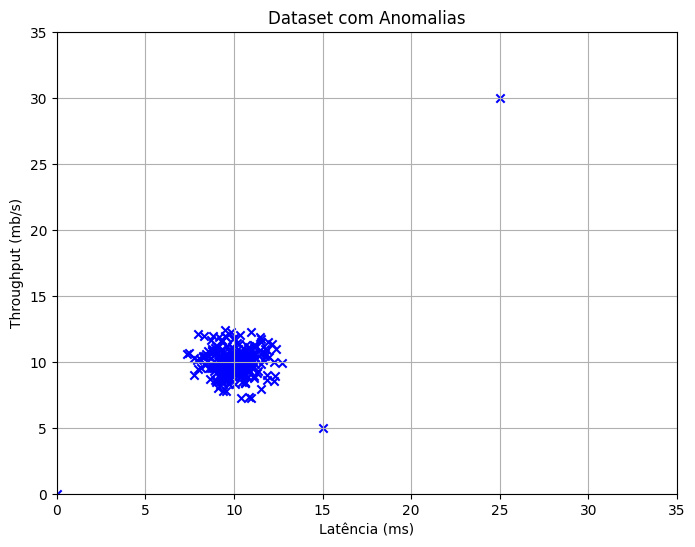

In [28]:
# Gerar dados normais centrados em (10, 10) com baixa variância
np.random.seed(0)
data = np.random.randn(300, 2) + 10

# Adicionar algumas anomalias distantes do centro
# Separar entre X_train e X_val
X_train = np.vstack([data[:250], np.array([[15, 5], [0, 0], [25, 30]])])
X_val =  np.vstack([data[250:], np.array([[20, 20], [5, 25], [30, 10]])])


# Visualizar o dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')
plt.title("Dataset com Anomalias")
plt.xlabel("Latência (ms)")
plt.ylabel("Throughput (mb/s)")
plt.axis([0, 35, 0, 35])
plt.grid(True)
plt.show()

In [29]:
# Criar rótulos para o conjunto de validação
# Os primeiros 50 exemplos são normais, os últimos 3 são anomalias
y_val = np.zeros(len(X_val))  # inicializa todos os valores como 0 (normal)
y_val[-3:] = 1  # Define os últimos 3 exemplos como 1 (anomalias)

# Mostrar os rótulos criados
print("Rótulos de validação (y_val):", y_val)

Rótulos de validação (y_val): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1.]


### Distribuição Gaussiana

Para realizar a detecção de anomalias, você primeiro precisa ajustar um modelo à distribuição dos dados.

* Dado um conjunto de treinamento $\{x^{(1)}, ..., x^{(m)}\}$, você deseja estimar a distribuição Gaussiana para cada uma das características $x_i$.

* Lembre-se de que a distribuição Gaussiana é dada por

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   onde $\mu$ é a média e $\sigma^2$ é a variância.
   
* Para cada característica $i = 1\ldots n$, você precisa encontrar os parâmetros $\mu_i$ e $\sigma_i^2$ que se ajustam aos dados na $i$-ésima dimensão $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (a $i$-ésima dimensão de cada exemplo).


### Estimando parâmetros para uma distribuição Gaussiana

**Implementação**: 

Você pode estimar os parâmetros, ($\mu_i$, $\sigma_i^2$), da $i$-ésima característica usando as seguintes equações. Para estimar a média, você usará:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

e para a variância você usará:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$


In [30]:
def estimate_gaussian(X):
    """
    Calcula a média e a variância de todas as características 
    no dataset
    
    Args:
        X (ndarray): Matriz de dados (m, n)
    
    Retorna:
        mu (ndarray): Média de todas as características (n,)
        var (ndarray): Variância de todas as características (n,)
    """
    m, n = X.shape
    mu = np.zeros(n)
    var = np.zeros(n)
    
    # Calculando a média para cada característica
    for i in range(n):
        sum_mu = 0
        for j in range(m):
            sum_mu += X[j, i]
        mu[i] = sum_mu / m
    
    # Calculando a variância para cada característica
    for i in range(n):
        sum_var = 0
        for j in range(m):
            sum_var += (X[j, i] - mu[i]) ** 2
        var[i] = sum_var / m
    
    return mu, var

# Estimativa da média e variância de cada característica
mu, var = estimate_gaussian(X_train)              

print("Média de cada característica:", mu)
print("Variância de cada característica:", var)

Média de cada característica: [ 9.98672308 10.02245787]
Variância de cada característica: [2.40081256 3.02728111]


In [31]:
from matplotlib.colors import LogNorm
def multivariate_gaussian(X, mu, sigma2):
    k = len(mu)  # Número de dimensões
    sigma2 = np.diag(sigma2)  # Garante que sigma2 seja diagonal para o caso multivariado
    X = X - mu  # Centraliza os dados
    p = (2 * np.pi) ** (-k / 2) * np.linalg.det(sigma2) ** (-0.5) * \
        np.exp(-0.5 * np.sum(np.dot(X, np.linalg.inv(sigma2)) * X, axis=1))
    return p

def visualize_fit(X, mu, sigma2):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], marker='x', c='b')
    
    # Cria uma grade para plotar a densidade
    x = np.linspace(0, 30, 100)
    y = np.linspace(0, 30, 100)
    X1, X2 = np.meshgrid(x, y)
    Z = multivariate_gaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, sigma2)
    Z = Z.reshape(X1.shape)

    # Plota os contornos
    plt.contour(X1, X2, Z, levels=10**(np.arange(-20, 1, 3, dtype=float)), norm=LogNorm(), cmap='viridis')
    plt.title('Ajuste das Distribuições Gaussianas')
    plt.xlabel('Latência (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

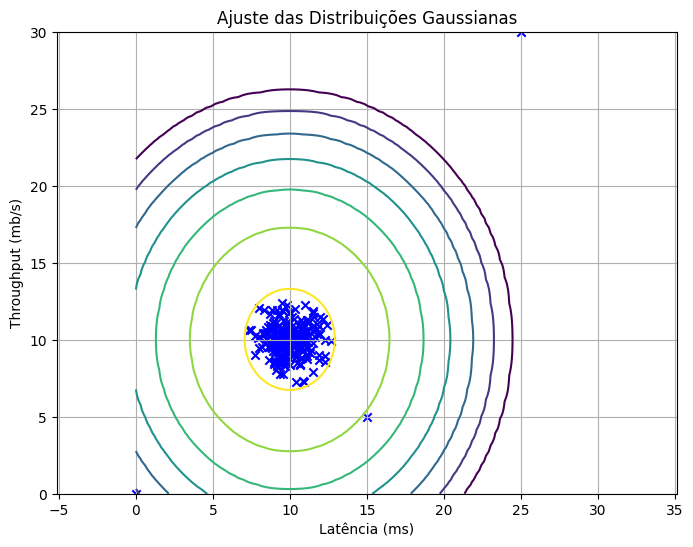

In [32]:
p = multivariate_gaussian(X_train, mu, var)
visualize_fit(X_train, mu, var)

### Selecionando o limiar $\epsilon$

Agora que você estimou os parâmetros Gaussianos, pode investigar quais exemplos têm uma probabilidade muito alta dada essa distribuição e quais têm uma probabilidade muito baixa.

* Os exemplos de baixa probabilidade têm mais chances de serem as anomalias em nosso conjunto de dados.
* Uma maneira de determinar quais exemplos são anomalias é selecionar um limiar com base em um conjunto de validação cruzada.

Nesta seção, você completará o código na função `select_threshold` para selecionar o limiar $\epsilon$ usando o score $F_1$ em um conjunto de validação cruzada.

* Para isso, usaremos um conjunto de validação cruzada $\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$, onde o rótulo $y=1$ corresponde a um exemplo anômalo, e $y=0$ a um exemplo normal.
* Para cada exemplo de validação cruzada, calcularemos $p(x_{\rm cv}^{(i)})$. O vetor de todas essas probabilidades $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv})})$ é passado para `select_threshold` no vetor `p_val`.
* Os rótulos correspondentes $y_{\rm cv}^{(1)}, \ldots, y_{\rm cv}^{(m_{\rm cv})}$ são passados para a mesma função no vetor `y_val`.


* No código fornecido `select_threshold`, já existe um loop que testará muitos valores diferentes de $\epsilon$ e selecionará o melhor $\epsilon$ com base no score $F_1$.

* Você precisa implementar o código para calcular o score F1 a partir da escolha de `epsilon` como limiar e colocar o valor em `F1`.

  * Lembre-se de que se um exemplo $x$ tem uma probabilidade baixa $p(x) < \epsilon$, então ele é classificado como anômalo.


* Então, você pode calcular a precisão e o recall por:

$$
\begin{aligned}
\text{prec} &= \frac{tp}{tp+fp} \\
\text{rec} &= \frac{tp}{tp+fn},
\end{aligned}
$$

onde:
* $ tp $ é o número de verdadeiros positivos: o rótulo de verdade diz que é uma anomalia e nosso algoritmo corretamente classificou-o como uma anomalia.
* $ fp $ é o número de falsos positivos: o rótulo de verdade diz que não é uma anomalia, mas nosso algoritmo incorretamente classificou-o como uma anomalia.
* $ fn $ é o número de falsos negativos: o rótulo de verdade diz que é uma anomalia, mas nosso algoritmo incorretamente classificou-o como não sendo anômalo.

* O score $ F_1 $ é calculado usando precisão ($\text{prec}$) e recall ($\text{rec}$) da seguinte forma:

$$
F_1 = \frac{2 \cdot \text{prec} \cdot \text{rec}}{\text{prec} + \text{rec}}
$$


In [33]:
def select_threshold(y_val, p_val):
    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        predictions = (p_val < epsilon)
        
        tp = np.sum((predictions == 1) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        fn = np.sum((predictions == 0) & (y_val == 1))
        
        if tp + fp == 0 or tp + fn == 0:
            continue
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        
        if prec + rec == 0:
            continue
        
        F1 = (2 * prec * rec) / (prec + rec)
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Melhor epsilon encontrado usando validação cruzada: %e' % epsilon)
print('Melhor F1 no Conjunto de Validação Cruzada: %f' % F1)

Melhor epsilon encontrado usando validação cruzada: 5.859804e-05
Melhor F1 no Conjunto de Validação Cruzada: 1.000000


O score $ F_1 $ é a média harmônica da precisão e do recall. Aqui está o que cada um desses componentes significa:

- **Precisão (Precision)**: É a proporção de identificações positivas que foram realmente corretas. Em outras palavras, é a fração de exemplos identificados como anômalos que são realmente anômalos.
  
  $$ \text{Precisão} = \frac{\text{Verdadeiros Positivos (tp)}}{\text{Verdadeiros Positivos (tp)} + \text{Falsos Positivos (fp)}} $$

- **Recall (Sensibilidade)**: É a proporção de anomalias reais que foram identificadas corretamente. Ou seja, é a fração de todos os exemplos reais de anomalias que foram detectados pelo algoritmo.
  
  $$ \text{Recall} = \frac{\text{Verdadeiros Positivos (tp)}}{\text{Verdadeiros Positivos (tp)} + \text{Falsos Negativos (fn)}} $$

- Um **score $ F_1 $ alto** indica que o algoritmo tem um bom desempenho tanto em precisão quanto em recall. Isto é, não apenas identifica corretamente uma grande proporção de anomalias (alto recall), mas também mantém um baixo número de falsos positivos (alta precisão).
- Um **score $ F_1 $ baixo** pode indicar que, embora o algoritmo possa ser bom em identificar anomalias (alto recall) ou em evitar falsos positivos (alta precisão), ele não é suficientemente bom em ambos simultaneamente.

Na prática, ajustar o limiar $ \epsilon $ com base no score $ F_1 $ ajuda a encontrar o ponto ideal em que o equilíbrio entre a perda de verdadeiros positivos (não detectar anomalias reais) e o ganho de falsos positivos (marcar incorretamente pontos normais como anômalos) é otimizado.

In [34]:
def multivariate_gaussian(X, mu, sigma2):
    k = len(mu)
    sigma2 = np.diag(sigma2)  # Converter a variância para uma matriz de covariância diagonal
    X = X - mu
    p = (2 * np.pi) ** (-k / 2) * np.linalg.det(sigma2) ** (-0.5) * \
        np.exp(-0.5 * np.sum(np.dot(X, np.linalg.inv(sigma2)) * X, axis=1))
    return p

def visualize_fit(X, mu, sigma2, outliers=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], marker='x', c='b')
    
    # Criando uma grade para a plotagem
    x = np.linspace(0, 30, 100)
    y = np.linspace(0, 30, 100)
    X1, X2 = np.meshgrid(x, y)
    Z = multivariate_gaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, sigma2)
    Z = Z.reshape(X1.shape)
    
    # Plotar os contornos da densidade
    plt.contour(X1, X2, Z, levels=np.logspace(-20, 0, 20), norm=LogNorm(), cmap='viridis')
    plt.title('Ajuste das Distribuições Gaussianas')
    plt.xlabel('Latência (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.grid(True)
    
    # Se houver outliers, marcá-los
    if outliers is not None:
        plt.plot(X[outliers, 0], X[outliers, 1], 'ro', markersize=10, markerfacecolor='none', markeredgewidth=2)
    
    plt.axis('equal')
    plt.show()

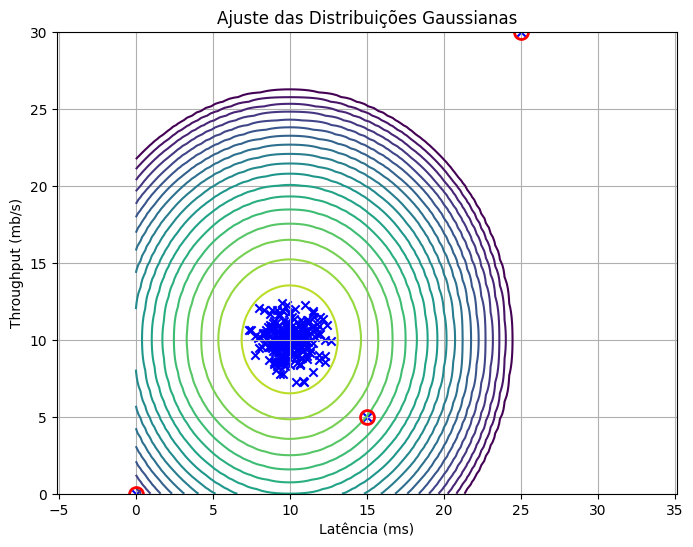

In [35]:
# Calcular probabilidades para o conjunto de treinamento
p = multivariate_gaussian(X_train, mu, var)

# Determinar quais exemplos estão abaixo do limiar (outliers)
epsilon, F1 = select_threshold(y_val, p_val)
outliers = p < epsilon

# Visualizar o ajuste e marcar os outliers
visualize_fit(X_train, mu, var, outliers)